In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import mrmr
from pymrmr import mRMR
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import mrmr
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import os.path
import json
from sklearn.metrics import auc, precision_recall_curve, average_precision_score, PrecisionRecallDisplay
import pymrmr
from scipy.stats import kruskal, mannwhitneyu, kendalltau, spearmanr
from boruta import BorutaPy
import umap.umap_ as umap
import icikt
from tqdm import tqdm
from sklearn.feature_selection import mutual_info_classif as MIC
from minepy import MINE
import random

random.seed(10)

# Import data

In [2]:
# import data from csv 
cnv = pd.read_csv('dataset_hg19/dataset/cnv.csv', sep=' ')

cnv.head()

,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA-3C-AALI,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-3C-AALK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-4H-AAAK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5L-AAT1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5T-A9QA,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
miRNA = pd.read_csv('dataset_hg19/dataset/mirna.csv', sep=' ')

miRNA.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-3,hsa-mir-941-4,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-3C-AALI,49201,98691,49035,148591,5095,3263,3566,133,41683,2231,...,0,0,52,0,4,8,383,547,1503,80378
TCGA-3C-AALK,57278,114320,57540,164553,18464,2114,8364,113,40723,2245,...,0,0,22,0,22,11,459,263,6620,152218
TCGA-4H-AAAK,67196,134563,67607,136918,20429,2162,10556,139,50848,2056,...,0,0,13,0,7,5,123,212,6666,158568
TCGA-5L-AAT1,94243,188921,94346,211457,21076,2657,12104,272,94610,3903,...,0,0,23,0,12,11,235,529,5352,196557
TCGA-5T-A9QA,49313,97721,49623,127544,2134,1769,8190,104,28306,2792,...,0,0,72,0,3,23,186,146,445,127728


In [4]:
mRNA = pd.read_csv('dataset_hg19/dataset/mrna.csv', sep=' ')

mRNA.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-3C-AALI,436.55,0,0,130.32,8,13924.87,290,1,0,1633,...,110,825,2470,365,1110,10123,2425,748,1704,0
TCGA-3C-AALK,461.69,0,0,151.08,4,26490.85,1224,0,0,1878,...,133,1058,2088,424,1468,13756,1888,1694,161,0
TCGA-4H-AAAK,631.87,1,9,362.77,8,22525.79,804,1,1,1925,...,115,997,2467,33,1823,9498,1955,2072,440,0
TCGA-5L-AAT1,259.26,0,0,125.12,5,18903.93,323,1,0,971,...,55,697,1213,66,630,5421,1732,698,71,0
TCGA-5T-A9QA,600.72,1,1,446.68,0,6084.91,787,7,0,1670,...,55,547,1548,4,615,6160,2132,843,7,0


In [5]:
proteins = pd.read_csv('dataset_hg19/dataset/proteins.csv', sep=' ')

proteins.head()

,14-3-3_beta,14-3-3_epsilon,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf,A-Raf_pS299,...,p27_pT157,p27_pT198,p38_MAPK,p38_pT180_Y182,p53,p62-LCK-ligand,p70S6K,p70S6K_pT389,p90RSK,p90RSK_pT359_S363
TCGA-3C-AALI,-0.000752,0.022553,0.021112,0.101796,-0.382850,-0.108997,0.103860,-0.335720,0.139450,0.148123,...,-0.076626,-0.231296,-0.169884,0.040360,-0.043975,1.293687,0.783984,0.162565,-0.667649,-0.102581
TCGA-3C-AALK,-0.202252,0.077041,0.153997,0.299107,-0.438903,-0.460678,-0.358195,0.474016,0.376476,-0.160318,...,-0.219547,-0.340080,0.208381,0.365363,-0.136875,0.680809,0.612644,-0.131174,0.419210,-0.118623
TCGA-4H-AAAK,-0.208434,0.062566,0.034209,0.429696,-0.102852,-0.499466,-0.433138,0.143794,0.339525,-0.221161,...,-0.070647,-0.471717,-0.052702,0.068514,-0.080364,0.300677,0.819253,-0.520017,0.003252,-0.855659
TCGA-5L-AAT1,-0.465476,0.141845,0.232721,0.427772,-0.231596,0.276124,-0.411702,0.736283,0.398665,-0.063979,...,-0.145362,-0.582255,0.346637,0.289421,-0.225658,0.591818,0.623455,-0.559783,0.510494,-0.601296
TCGA-5T-A9QA,-0.354823,0.156575,0.249023,1.197526,0.447913,1.001215,0.307314,0.581762,0.316779,-0.085146,...,0.076588,-0.325001,0.166015,-1.064492,0.181296,-0.226434,0.842169,0.280629,0.524148,-0.500144


# Import label

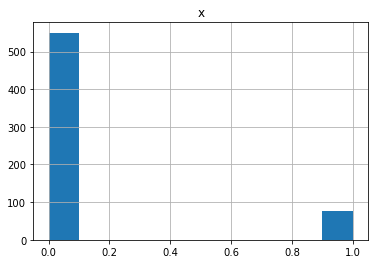

In [6]:
label = pd.read_csv('dataset_hg19/dataset/labels_pfi.csv', sep=' ')

label.hist()
plt.show()

# Check NaN values

In [7]:
def checkNaNValues(dataset):
    if dataset.isna().sum().sum() == 0:
        print(f"Non sono presenti dati NaN")
    else:
        for column in dataset:
            if dataset[column].isna().sum() == 0:
                print(f"Nella colonna {column} non sono presenti dati NaN")
            else:
                print(f"Nella colonna {column} sono presenti: {dataset[column].isna().sum()}")

In [8]:
checkNaNValues(cnv)

Non sono presenti dati NaN


In [9]:
checkNaNValues(mRNA)

Non sono presenti dati NaN


In [10]:
checkNaNValues(miRNA)

Non sono presenti dati NaN


In [11]:
checkNaNValues(proteins)

Non sono presenti dati NaN


# Normalize data

In [12]:
def dataNormalization(scaler, data):
    scl = scaler()
    model = scl.fit(data)
    scaled_data = model.transform(data)
    
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Filter feature with low variability

In [13]:
def filter_features_with_low_variability(data, alfa) -> pd.DataFrame:
    for column in data:
        if data[column].std() < alfa:
            #print(f'column: {column} has standard deviation < {alfa}, removed')
            data.drop(column, axis=1, inplace=True)
    return data

# Normalize and filter datasets

In [14]:
dataset_dict = {'cnv': cnv, 'mirna': miRNA, 'mrna': mRNA, 'proteins': proteins}

In [15]:
def create_data_normalized_filtered(data_dict, scaler, min_variance):
    dict_filtered_nornalize = {}
    for (key, value) in zip(data_dict, data_dict.values()):
        if key != 'cnv':
            dict_filtered_nornalize[key] = filter_features_with_low_variability(dataNormalization(MinMaxScaler, value), 0.05)
        else:
            dict_filtered_nornalize[key] = value
    return dict_filtered_nornalize

# Store and retrieve data normalize and filtered

In [16]:
def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else: raise

In [17]:
def store_filtered_normalize_data(dataset_dict):
    if not os.path.exists('filtered_normalize_data'):
        mkdir_p('filtered_normalize_data')
        filtered_normalize_data = create_data_normalized_filtered(dataset_dict, MinMaxScaler, 0.05)
        for data in dataset_dict:
            filtered_normalize_data[data].to_json('filtered_normalize_data/'+data+'.json')

In [18]:
def load_filtered_normalize_data(dataset_dict):
    dict_test = {}
    if os.path.exists('filtered_normalize_data'):
        for data in dataset_dict:
            with open('filtered_normalize_data/'+data+'.json', 'r') as fp:
                dataset = pd.read_json(fp)
                dict_test[data] = dataset
        return dict_test
    else:
        store_filtered_normalize_data(dataset_dict)
        load_filtered_normalize_data(dataset_dict)

In [19]:
%time datasets = load_filtered_normalize_data(dataset_dict)

CPU times: user 8.8 s, sys: 826 ms, total: 9.63 s
Wall time: 10.5 s


In [20]:
datasets

{'cnv':               ACAP3  ACTRT2  AGRN  ANKRD65  ATAD3A  ATAD3B  ATAD3C  AURKAIP1  \
 TCGA-3C-AALI     -1      -1    -1       -1      -1      -1      -1        -1   
 TCGA-3C-AALK      0       0     0        0       0       0       0         0   
 TCGA-4H-AAAK      0       0     0        0       0       0       0         0   
 TCGA-5L-AAT1      0       0     0        0       0       0       0         0   
 TCGA-5T-A9QA     -1      -1    -1       -1      -1      -1      -1        -1   
 ...             ...     ...   ...      ...     ...     ...     ...       ...   
 TCGA-W8-A86G      0       0     0        0       0       0       0         0   
 TCGA-WT-AB41     -1      -1    -1       -1      -1      -1      -1        -1   
 TCGA-XX-A899      0       0     0        0       0       0       0         0   
 TCGA-Z7-A8R5     -1      -1    -1       -1      -1      -1      -1        -1   
 TCGA-Z7-A8R6      0       0     0        0       0       0       0         0   
 
               B3GA

In [21]:
#baseline AUPRC
label[label['x'] == 1].count()/len(label)

x    0.122807
dtype: float64

In [22]:
#Numero positivi
label[label['x'] == 1].count()

x    77
dtype: int64

# Correlation with Spearman on cnv

In [23]:
p_value_threshold = 0.05
correlation_threshold = 0.01

In [24]:
def compute_spearmanr_with_label(dataset, label):
    not_correlated_features = []
    for feature in tqdm(dataset.columns, desc=f"Running Spearman test on cnv", dynamic_ncols=True, leave=False):
        correlation, p_value = spearmanr(dataset[feature].values.flatten(), label.values.flatten())
        if p_value > p_value_threshold:
            #print(f"In cnv the feature {feature} does not correlate in a statistically significant manner with the output. p-value:{p_value} -- correlation:{correlation}")
            not_correlated_features.append(feature)
    return not_correlated_features

In [25]:
def spearmanr_between_feature(
    X:pd.DataFrame,
    feature_left: str,
    feature_right: str,
):
    """Returns Spearman correlation.
    
    Parameters
    ----------------------
    X:pd.DataFrame,
        The epigenomic data.
    feature_left: str,
        The left features to compute pearson for.
    feature_right: str,
        The right features to compute pearson for.
    """
    correlation, p_value = spearmanr(
        X[feature_left].values.flatten(),
        X[feature_right].values.flatten(),
    )
    return dict(
        correlation=correlation,
        p_value=p_value
    )

In [26]:
def compute_spearmanr_between_feature(dataset):
    spearman_result = []
    score = []
    highly_correlated_future = []
    for feature_left in tqdm(dataset.columns, desc=f"Running Spearman test", dynamic_ncols=True, leave=False):
        for feature_right in dataset.columns:
                spearman_result  = spearmanr_between_feature(dataset,feature_left,feature_right)
                
                score.append(spearman_result)
                if feature_left!=feature_right and spearman_result["p_value"] < p_value_threshold and np.abs(spearman_result["correlation"]) > 0.95:
                    correlation = spearman_result["correlation"]
                    #print(f"The feature {feature_left} is highly correlated with {feature_right} ({correlation}).")
                    highly_correlated_future.append(feature_left)
    return highly_correlated_future

## Creation cnv dataset after drop feature not correlated with output and features with higly correlations with other features

In [27]:
def compute_all_spearman(dataset, label):
    #Drop features not correlated with output
    new_df = dataset.drop(compute_spearmanr_with_label(dataset, label), axis=1)
    high_correlated_feature = compute_spearmanr_between_feature(new_df)
    return new_df.drop(high_correlated_feature, axis=1).columns

# Correlation with Mine

In [28]:
def compute_mine(dataset, label):
    feature_to_drop = []
    for feature in tqdm(dataset.columns, desc=f"Running MINE test", dynamic_ncols=True, leave=False):
        mine = MINE()
        mine.compute_score(dataset[feature].values.ravel(), label.values.ravel())
        score = mine.mic()
        if score < correlation_threshold:
            feature_to_drop.append(feature)
    return dataset.drop(feature_to_drop, axis=1).columns

# Univariate feature selection using Kruskal-Wallis e Mann-Whitney

In [29]:
def create_dataframe_pos_neg(dataset, label):
    return (dataset[label['x']==1], dataset[label['x']==0])

In [30]:
def univariate_features_selection(dataset, label, univariate_tecnique, min_pValue):
    pos, neg = create_dataframe_pos_neg(dataset, label)
    H, pval = univariate_tecnique(pos, neg)
    mask = (pval < min_pValue)
    return dataset.columns[mask]

# Umap

In [31]:
#init='random'
def execute_umap(n_components, X, y):
    return umap.UMAP(n_neighbors=5, n_components=n_components, random_state=42).fit_transform(X, y)

# Multivariate feature selection, mrmr and Boruta

In [32]:
def execute_mrmr(dataset, n_feature):
    return mRMR(dataset, 'MIQ', n_feature)

In [33]:
def execute_boruta_feature_selection(
    X_train: pd.DataFrame,
    y_train: np.ndarray,
    holdout_number: int,
    max_iter: int = 100,
):
    """Returns tuple with list of kept features and list of discared features.
    
    Parameters
    --------------------------
    X_train: pd.DataFrame,
        The data reserved for the input of the training of the Boruta model.
    y_train: np.ndarray,
        The data reserved for the output of the training of the Boruta model.
    holdout_number: int,
        The current holdout number.
    max_iter: int = 100,
        Number of iterations to run Boruta for.
    """
    
    print('execute boruta')

    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5)
    
    boruta_selector = BorutaPy(
        model,
        n_estimators='auto',
        verbose=False,
        alpha=0.05,
        max_iter=max_iter, 
        random_state=42,
    )
    boruta_selector.fit(X_train.values, y_train.values.ravel())
    
    kept_features = list(X_train.columns[boruta_selector.support_])
    discarded_features = list(X_train.columns[~boruta_selector.support_])
    
    return kept_features, discarded_features

# Train

In [34]:
def train_model(key, label, num_extenal_fold, type_feature_selection, datasets):
    
    """Return AUPRC score after training.
    
    Parameters
    --------------------------
    dataset: string,
        The data reserved for the input of the training.
    label: pd.DataFrame,
        The data reserved for the output of the training.
    num_external_fold: int,
        The current holdout number.
    type_feature_selection: string,
        Type of feature selection: ['kruskal', 'mrmr', 'mannwhitneyu', 'boruta']
    min_pValue: int,
        Minimum value of p_value. Valid if type_feature_selection == 'kruskal' or 'mannwhitneyu',
    use_umap: bool,
        Specified to use or not use UMAP for feature extraction after univariate feature selection (kruskal, mannwhitneyu)
    """
    
    aucs =[]
    dataset = datasets[key]
    y_score_concatenated = []
    y_test_fold_concatenated = []
    
    #to numpy
    X_numpy = dataset.to_numpy()
    y_numpy = label['x'].to_numpy()
    
    iterator = 0
    
    external_fold = StratifiedKFold(n_splits=num_extenal_fold, shuffle=True, random_state=1)
    
    for train_index, test_index in tqdm(external_fold.split(X_numpy, label), desc=f"Running fold ", dynamic_ncols=True, leave=False):
        
        X_train_fold, X_test_fold = X_numpy[train_index], X_numpy[test_index]
        y_train_fold, y_test_fold = y_numpy[train_index], y_numpy[test_index]
        
        df_X_train = pd.DataFrame(data=X_train_fold, columns=dataset.columns)
        df_X_test = pd.DataFrame(data=X_test_fold, columns=dataset.columns)
        df_y_train = pd.DataFrame(data=y_train_fold, columns=label.columns)
        
        
        #feature selection
        if 'kruskal' in type_feature_selection:
            selected_features = univariate_features_selection(df_X_train, df_y_train, kruskal, 0.05)
        elif 'mannwhitneyu' in type_feature_selection:
            selected_features = univariate_features_selection(df_X_train, df_y_train, mannwhitneyu, 0.05)
        elif type_feature_selection == "mrmr":
            selected_features = execute_mrmr(df_X_train, 100)
        elif type_feature_selection == 'boruta':
            selected_features, discarded_feature =  execute_boruta_feature_selection(df_X_train, df_y_train, 5)
        elif type_feature_selection == 'mine':
            selected_features = compute_mine(df_X_train, df_y_train)
        elif type_feature_selection == 'spearman':
            selected_features = compute_all_spearman(df_X_train, df_y_train)
        else:
            return "Invalid", "type of feature selection"
              
        X_train_selected_feature = df_X_train[selected_features]
        X_test_selected_feature = df_X_test[selected_features]
        
        
        if 'umap' in type_feature_selection:
            X_train_selected_feature = execute_umap(50, X_train_selected_feature, y_train_fold)
            X_test_selected_feature = execute_umap(50, X_test_selected_feature , y_test_fold)
            
        clf = GridSearchCV(estimator=RandomForestClassifier(),
                           scoring='average_precision',
                           param_grid=model_selection_grid_DT, 
                           cv=2, 
                           n_jobs=-1)
        clf.fit(X_train_selected_feature, y_train_fold)
    
        # Get the predicited probability of testing data
        y_score = clf.predict_proba(X_test_selected_feature)[:, 1]
        
        #calculate precision and recall
        precision, recall, thresholds = precision_recall_curve(y_test_fold, y_score)
        
        y_score_concatenated = np.concatenate((y_score_concatenated, y_score), axis=None)
        y_test_fold_concatenated = np.concatenate((y_test_fold_concatenated, y_test_fold), axis=None)
        
        # Use AUC function to calculate the area under the curve of precision recall curve
        auc_precision_recall = auc(recall, precision)
        
        aucs.append(auc_precision_recall)
        #print('auc: {:.3f} using params {}:'.format(auc_precision_recall, clf.best_params_))
        
        #plot precision recall curve
        PrecisionRecallDisplay.from_predictions(y_test_fold, y_score)

        plt.title('Random_Forest internal')
        #plt.show()
        
        iterator = iterator +1
        plt.savefig('result_Many_Feature_Selection_notebook/'+key+'/'+type_feature_selection+'_'+'AUPRC_'+str(iterator)+'_Internal.pdf')
    
    internal_auc = np.mean(aucs)
    
    #calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test_fold_concatenated, y_score_concatenated)
    
    external_auc = auc(recall, precision)

    #plot precision recall curve
    PrecisionRecallDisplay.from_predictions(y_test_fold_concatenated, y_score_concatenated)

    plt.title('Random_Forest external')
    #plt.show()
    plt.savefig('result_Many_Feature_Selection_notebook/'+key+'/'+type_feature_selection+'_'+'AUPRC_External.pdf')
    
    return '{0:.4f}'.format(internal_auc), '{0:.4f}'.format(external_auc), str(clf.best_estimator_)

In [35]:
model_selection_grid_DT = [
    {'criterion': ['gini', 'entropy'],
     'max_leaf_nodes': [None, 2, 5, 10],
     'max_features': [None, 'sqrt', 'log2'],
    'n_estimators': [51, 101, 251, 500]}
]

# Train all datasets with combination of feature selection and feature extraction 

In [36]:
files_name = ['result_Many_Feature_Selection_notebook/proteins/proteins.json',
              'result_Many_Feature_Selection_notebook/miRNA/mRNA.json',
              'result_Many_Feature_Selection_notebook/mRNA/miRNA.json',
              'result_Many_Feature_Selection_notebook/cnv/cnv.json']
dataset_list = ['proteins', 'mrna', 'mirna', 'cnv']
feature_selection_list = ['mannwhitneyu', 'mrmr', 'mannwhitneyu_with_umap']

In [37]:
def create_result_json(result_dict, feature_selection_list, files_name, dataset_list, label, datasets,):
    for file_name, key in tqdm(zip(files_name, dataset_list), desc=f"Running training ", dynamic_ncols=True, leave=False):
        #print(f'FILE NAME {file_name}')
        if os.path.exists(file_name):
            with open(file_name, 'r') as fp:
                saved_dict = json.load(fp)
                result_dict[key] = saved_dict
                for feature_selection in tqdm(feature_selection_list,desc=f"Running {key} training ", dynamic_ncols=True, leave=False):
                    print(f'TECNICA DI FS exist {feature_selection}')
                    if not feature_selection in result_dict[key].keys():
                        result_dict[key][feature_selection] = {}    
                        result_dict[key][feature_selection]['internal'],  result_dict[key][feature_selection]['external'], result_dict[key][feature_selection]['best_estimator'] = train_model(key, label, 10, feature_selection, datasets)
                        with open(file_name, 'w', encoding='utf-8') as fp:
                            json.dump(result_dict[key], fp, ensure_ascii=False, indent=4)
        else:
            result_dict[key] = {}
            for feature_selection in tqdm(feature_selection_list, desc=f"Running {key} training ", dynamic_ncols=True, leave=False):
                print(f'TECNICA DI FS check {feature_selection}')
                print(f'file name {file_name}')
                result_dict[key][feature_selection] = {}    
                result_dict[key][feature_selection]['internal'],  result_dict[key][feature_selection]['external'], result_dict[key][feature_selection]['best_estimator'] = train_model(key, label, 10, feature_selection, datasets)
            with open(file_name, 'w', encoding='utf-8') as fp:
                json.dump(result_dict[key], fp, ensure_ascii=False, indent=4)

# Create cnv result using spearman

In [38]:
result_dict = {}

dataset_list = ['cnv']
cnv_file_name = ['result_Many_Feature_Selection_notebook/cnv/cnv.json']
feature_selection_list_cnv = ['spearman']

!mkdir  'result_Many_Feature_Selection_notebook'

Running training : 0it [00:00, ?it/s]
Running cnv training :   0%|                              | 0/1 [00:00<?, ?it/s]

TECNICA DI FS check spearman
file name result_Many_Feature_Selection_notebook/cnv/cnv.json




Running fold : 0it [00:00, ?it/s]


Running Spearman test on cnv:   0%|                   | 0/24776 [00:00<?, ?it/s]


Running Spearman test on cnv:   2%|       | 425/24776 [00:00<00:05, 4231.00it/s]


Running Spearman test on cnv:   3%|▏      | 849/24776 [00:00<00:05, 4119.75it/s]


Running Spearman test on cnv:   6%|▎     | 1389/24776 [00:00<00:04, 4692.25it/s]


Running Spearman test on cnv:   8%|▍     | 1964/24776 [00:00<00:04, 5101.70it/s]


Running Spearman test on cnv:  10%|▌     | 2533/24776 [00:00<00:04, 5310.10it/s]


Running Spearman test on cnv:  13%|▊     | 3104/24776 [00:00<00:03, 5445.16it/s]


Running Spearman test on cnv:  15%|▉     | 3692/24776 [00:00<00:03, 5584.51it/s]


Running Spearman test on cnv:  17%|█     | 4251/24776 [00:00<00:03, 5503.77it/s]


Running Spearman test on cnv:  19%|█▏    | 4802/24776 [00:00<00:03, 5388.04it/s]


Running Spearman test on cnv:  22%|█▎    | 5380/24776 [00:01<00:03, 5504.30it/s]


Running Spearman test on cnv:  24%|█▍    | 5948/2

Running Spearman test:   5%|▉                  | 41/790 [00:05<01:36,  7.77it/s]


Running Spearman test:   5%|█                  | 42/790 [00:05<01:35,  7.87it/s]


Running Spearman test:   5%|█                  | 43/790 [00:05<01:33,  7.97it/s]


Running Spearman test:   6%|█                  | 44/790 [00:05<01:32,  8.07it/s]


Running Spearman test:   6%|█                  | 45/790 [00:05<01:31,  8.16it/s]


Running Spearman test:   6%|█                  | 46/790 [00:05<01:30,  8.25it/s]


Running Spearman test:   6%|█▏                 | 47/790 [00:05<01:33,  7.94it/s]


Running Spearman test:   6%|█▏                 | 48/790 [00:06<01:32,  7.98it/s]


Running Spearman test:   6%|█▏                 | 49/790 [00:06<01:37,  7.58it/s]


Running Spearman test:   6%|█▏                 | 50/790 [00:06<01:37,  7.60it/s]


Running Spearman test:   6%|█▏                 | 51/790 [00:06<01:39,  7.41it/s]


Running Spearman test:   7%|█▎                 | 52/790 [00:06<01:39,  7.39it/s]


Runn

Running Spearman test:  16%|██▉               | 130/790 [00:16<01:28,  7.49it/s]


Running Spearman test:  17%|██▉               | 131/790 [00:16<01:25,  7.73it/s]


Running Spearman test:  17%|███               | 132/790 [00:16<01:23,  7.91it/s]


Running Spearman test:  17%|███               | 133/790 [00:16<01:27,  7.47it/s]


Running Spearman test:  17%|███               | 134/790 [00:16<01:25,  7.67it/s]


Running Spearman test:  17%|███               | 135/790 [00:17<01:24,  7.78it/s]


Running Spearman test:  17%|███               | 136/790 [00:17<01:22,  7.92it/s]


Running Spearman test:  17%|███               | 137/790 [00:17<01:21,  7.98it/s]


Running Spearman test:  17%|███▏              | 138/790 [00:17<01:22,  7.94it/s]


Running Spearman test:  18%|███▏              | 139/790 [00:17<01:21,  8.01it/s]


Running Spearman test:  18%|███▏              | 140/790 [00:17<01:20,  8.05it/s]


Running Spearman test:  18%|███▏              | 141/790 [00:17<01:20,  8.08it/s]


Runn

Running Spearman test:  28%|████▉             | 219/790 [00:27<01:15,  7.55it/s]


Running Spearman test:  28%|█████             | 220/790 [00:28<01:14,  7.61it/s]


Running Spearman test:  28%|█████             | 221/790 [00:28<01:14,  7.62it/s]


Running Spearman test:  28%|█████             | 222/790 [00:28<01:13,  7.69it/s]


Running Spearman test:  28%|█████             | 223/790 [00:28<01:13,  7.73it/s]


Running Spearman test:  28%|█████             | 224/790 [00:28<01:13,  7.75it/s]


Running Spearman test:  28%|█████▏            | 225/790 [00:28<01:15,  7.48it/s]


Running Spearman test:  29%|█████▏            | 226/790 [00:28<01:15,  7.49it/s]


Running Spearman test:  29%|█████▏            | 227/790 [00:28<01:14,  7.57it/s]


Running Spearman test:  29%|█████▏            | 228/790 [00:29<01:12,  7.77it/s]


Running Spearman test:  29%|█████▏            | 229/790 [00:29<01:13,  7.61it/s]


Running Spearman test:  29%|█████▏            | 230/790 [00:29<01:11,  7.81it/s]


Runn

Running Spearman test:  39%|███████           | 308/790 [00:39<01:01,  7.82it/s]


Running Spearman test:  39%|███████           | 309/790 [00:39<01:01,  7.86it/s]


Running Spearman test:  39%|███████           | 310/790 [00:39<01:01,  7.83it/s]


Running Spearman test:  39%|███████           | 311/790 [00:39<01:00,  7.97it/s]


Running Spearman test:  39%|███████           | 312/790 [00:39<00:59,  8.08it/s]


Running Spearman test:  40%|███████▏          | 313/790 [00:39<00:58,  8.19it/s]


Running Spearman test:  40%|███████▏          | 314/790 [00:39<00:57,  8.27it/s]


Running Spearman test:  40%|███████▏          | 315/790 [00:39<00:56,  8.34it/s]


Running Spearman test:  40%|███████▏          | 316/790 [00:40<00:56,  8.40it/s]


Running Spearman test:  40%|███████▏          | 317/790 [00:40<00:56,  8.44it/s]


Running Spearman test:  40%|███████▏          | 318/790 [00:40<00:56,  8.42it/s]


Running Spearman test:  40%|███████▎          | 319/790 [00:40<00:55,  8.42it/s]


Runn

Running Spearman test:  50%|█████████         | 397/790 [00:50<00:46,  8.39it/s]


Running Spearman test:  50%|█████████         | 398/790 [00:50<00:46,  8.42it/s]


Running Spearman test:  51%|█████████         | 399/790 [00:50<00:46,  8.45it/s]


Running Spearman test:  51%|█████████         | 400/790 [00:50<00:45,  8.48it/s]


Running Spearman test:  51%|█████████▏        | 401/790 [00:50<00:45,  8.48it/s]


Running Spearman test:  51%|█████████▏        | 402/790 [00:50<00:45,  8.48it/s]


Running Spearman test:  51%|█████████▏        | 403/790 [00:50<00:45,  8.48it/s]


Running Spearman test:  51%|█████████▏        | 404/790 [00:50<00:45,  8.48it/s]


Running Spearman test:  51%|█████████▏        | 405/790 [00:50<00:45,  8.46it/s]


Running Spearman test:  51%|█████████▎        | 406/790 [00:51<00:45,  8.46it/s]


Running Spearman test:  52%|█████████▎        | 407/790 [00:51<00:45,  8.46it/s]


Running Spearman test:  52%|█████████▎        | 408/790 [00:51<00:45,  8.46it/s]


Runn

Running Spearman test:  62%|███████████       | 486/790 [01:00<00:36,  8.39it/s]


Running Spearman test:  62%|███████████       | 487/790 [01:00<00:35,  8.43it/s]


Running Spearman test:  62%|███████████       | 488/790 [01:01<00:35,  8.44it/s]


Running Spearman test:  62%|███████████▏      | 489/790 [01:01<00:35,  8.43it/s]


Running Spearman test:  62%|███████████▏      | 490/790 [01:01<00:35,  8.43it/s]


Running Spearman test:  62%|███████████▏      | 491/790 [01:01<00:35,  8.40it/s]


Running Spearman test:  62%|███████████▏      | 492/790 [01:01<00:35,  8.28it/s]


Running Spearman test:  62%|███████████▏      | 493/790 [01:01<00:35,  8.33it/s]


Running Spearman test:  63%|███████████▎      | 494/790 [01:01<00:35,  8.38it/s]


Running Spearman test:  63%|███████████▎      | 495/790 [01:01<00:35,  8.40it/s]


Running Spearman test:  63%|███████████▎      | 496/790 [01:02<00:34,  8.44it/s]


Running Spearman test:  63%|███████████▎      | 497/790 [01:02<00:34,  8.46it/s]


Runn

Running Spearman test:  73%|█████████████     | 575/790 [01:11<00:25,  8.42it/s]


Running Spearman test:  73%|█████████████     | 576/790 [01:11<00:25,  8.40it/s]


Running Spearman test:  73%|█████████████▏    | 577/790 [01:11<00:25,  8.43it/s]


Running Spearman test:  73%|█████████████▏    | 578/790 [01:12<00:25,  8.43it/s]


Running Spearman test:  73%|█████████████▏    | 579/790 [01:12<00:26,  8.11it/s]


Running Spearman test:  73%|█████████████▏    | 580/790 [01:12<00:25,  8.15it/s]


Running Spearman test:  74%|█████████████▏    | 581/790 [01:12<00:25,  8.20it/s]


Running Spearman test:  74%|█████████████▎    | 582/790 [01:12<00:25,  8.23it/s]


Running Spearman test:  74%|█████████████▎    | 583/790 [01:12<00:25,  8.26it/s]


Running Spearman test:  74%|█████████████▎    | 584/790 [01:12<00:24,  8.28it/s]


Running Spearman test:  74%|█████████████▎    | 585/790 [01:12<00:24,  8.27it/s]


Running Spearman test:  74%|█████████████▎    | 586/790 [01:12<00:24,  8.27it/s]


Runn

Running Spearman test:  84%|███████████████▏  | 664/790 [01:22<00:15,  8.28it/s]


Running Spearman test:  84%|███████████████▏  | 665/790 [01:22<00:15,  8.30it/s]


Running Spearman test:  84%|███████████████▏  | 666/790 [01:22<00:14,  8.32it/s]


Running Spearman test:  84%|███████████████▏  | 667/790 [01:22<00:14,  8.34it/s]


Running Spearman test:  85%|███████████████▏  | 668/790 [01:22<00:14,  8.31it/s]


Running Spearman test:  85%|███████████████▏  | 669/790 [01:22<00:14,  8.29it/s]


Running Spearman test:  85%|███████████████▎  | 670/790 [01:23<00:14,  8.29it/s]


Running Spearman test:  85%|███████████████▎  | 671/790 [01:23<00:14,  8.13it/s]


Running Spearman test:  85%|███████████████▎  | 672/790 [01:23<00:14,  8.21it/s]


Running Spearman test:  85%|███████████████▎  | 673/790 [01:23<00:14,  8.30it/s]


Running Spearman test:  85%|███████████████▎  | 674/790 [01:23<00:13,  8.35it/s]


Running Spearman test:  85%|███████████████▍  | 675/790 [01:23<00:13,  8.30it/s]


Runn

Running Spearman test:  95%|█████████████████▏| 753/790 [01:33<00:04,  7.91it/s]


Running Spearman test:  95%|█████████████████▏| 754/790 [01:33<00:04,  8.01it/s]


Running Spearman test:  96%|█████████████████▏| 755/790 [01:33<00:04,  8.09it/s]


Running Spearman test:  96%|█████████████████▏| 756/790 [01:33<00:04,  8.15it/s]


Running Spearman test:  96%|█████████████████▏| 757/790 [01:33<00:04,  8.19it/s]


Running Spearman test:  96%|█████████████████▎| 758/790 [01:33<00:03,  8.22it/s]


Running Spearman test:  96%|█████████████████▎| 759/790 [01:33<00:03,  8.25it/s]


Running Spearman test:  96%|█████████████████▎| 760/790 [01:34<00:03,  8.28it/s]


Running Spearman test:  96%|█████████████████▎| 761/790 [01:34<00:03,  8.31it/s]


Running Spearman test:  96%|█████████████████▎| 762/790 [01:34<00:03,  8.33it/s]


Running Spearman test:  97%|█████████████████▍| 763/790 [01:34<00:03,  8.33it/s]


Running Spearman test:  97%|█████████████████▍| 764/790 [01:34<00:03,  8.31it/s]


Runn

Running Spearman test:   2%|▍                  | 12/524 [00:00<00:41, 12.35it/s]


Running Spearman test:   3%|▌                  | 14/524 [00:01<00:40, 12.47it/s]


Running Spearman test:   3%|▌                  | 16/524 [00:01<00:41, 12.30it/s]


Running Spearman test:   3%|▋                  | 18/524 [00:01<00:41, 12.27it/s]


Running Spearman test:   4%|▋                  | 20/524 [00:01<00:40, 12.32it/s]


Running Spearman test:   4%|▊                  | 22/524 [00:01<00:40, 12.36it/s]


Running Spearman test:   5%|▊                  | 24/524 [00:01<00:40, 12.42it/s]


Running Spearman test:   5%|▉                  | 26/524 [00:02<00:40, 12.44it/s]


Running Spearman test:   5%|█                  | 28/524 [00:02<00:39, 12.47it/s]


Running Spearman test:   6%|█                  | 30/524 [00:02<00:39, 12.48it/s]


Running Spearman test:   6%|█▏                 | 32/524 [00:02<00:39, 12.44it/s]


Running Spearman test:   6%|█▏                 | 34/524 [00:02<00:39, 12.28it/s]


Runn

Running Spearman test:  36%|██████▌           | 190/524 [00:15<00:27, 12.28it/s]


Running Spearman test:  37%|██████▌           | 192/524 [00:15<00:26, 12.31it/s]


Running Spearman test:  37%|██████▋           | 194/524 [00:15<00:26, 12.34it/s]


Running Spearman test:  37%|██████▋           | 196/524 [00:16<00:26, 12.37it/s]


Running Spearman test:  38%|██████▊           | 198/524 [00:16<00:26, 12.38it/s]


Running Spearman test:  38%|██████▊           | 200/524 [00:16<00:26, 12.33it/s]


Running Spearman test:  39%|██████▉           | 202/524 [00:16<00:26, 12.37it/s]


Running Spearman test:  39%|███████           | 204/524 [00:16<00:25, 12.41it/s]


Running Spearman test:  39%|███████           | 206/524 [00:16<00:25, 12.45it/s]


Running Spearman test:  40%|███████▏          | 208/524 [00:17<00:25, 12.46it/s]


Running Spearman test:  40%|███████▏          | 210/524 [00:17<00:25, 12.46it/s]


Running Spearman test:  40%|███████▎          | 212/524 [00:17<00:25, 12.45it/s]


Runn

Running Spearman test:  70%|████████████▋     | 368/524 [00:30<00:12, 12.26it/s]


Running Spearman test:  71%|████████████▋     | 370/524 [00:30<00:12, 12.37it/s]


Running Spearman test:  71%|████████████▊     | 372/524 [00:30<00:12, 12.40it/s]


Running Spearman test:  71%|████████████▊     | 374/524 [00:30<00:12, 12.06it/s]


Running Spearman test:  72%|████████████▉     | 376/524 [00:30<00:12, 12.01it/s]


Running Spearman test:  72%|████████████▉     | 378/524 [00:30<00:12, 11.81it/s]


Running Spearman test:  73%|█████████████     | 380/524 [00:31<00:12, 11.79it/s]


Running Spearman test:  73%|█████████████     | 382/524 [00:31<00:11, 12.04it/s]


Running Spearman test:  73%|█████████████▏    | 384/524 [00:31<00:11, 12.22it/s]


Running Spearman test:  74%|█████████████▎    | 386/524 [00:31<00:11, 12.25it/s]


Running Spearman test:  74%|█████████████▎    | 388/524 [00:31<00:11, 12.20it/s]


Running Spearman test:  74%|█████████████▍    | 390/524 [00:31<00:10, 12.28it/s]


Runn

Running Spearman test on cnv:  18%|█     | 4449/24776 [00:00<00:03, 5609.75it/s]


Running Spearman test on cnv:  20%|█▏    | 5022/24776 [00:00<00:03, 5645.11it/s]


Running Spearman test on cnv:  23%|█▎    | 5588/24776 [00:01<00:03, 5550.27it/s]


Running Spearman test on cnv:  25%|█▍    | 6145/24776 [00:01<00:03, 4777.67it/s]


Running Spearman test on cnv:  27%|█▌    | 6710/24776 [00:01<00:03, 5009.90it/s]


Running Spearman test on cnv:  29%|█▊    | 7265/24776 [00:01<00:03, 5160.01it/s]


Running Spearman test on cnv:  31%|█▉    | 7794/24776 [00:01<00:03, 5189.92it/s]


Running Spearman test on cnv:  34%|██    | 8322/24776 [00:01<00:03, 5201.69it/s]


Running Spearman test on cnv:  36%|██▏   | 8849/24776 [00:01<00:03, 5205.32it/s]


Running Spearman test on cnv:  38%|██▎   | 9374/24776 [00:01<00:02, 5181.03it/s]


Running Spearman test on cnv:  40%|██▍   | 9896/24776 [00:01<00:02, 5127.04it/s]


Running Spearman test on cnv:  42%|██   | 10461/24776 [00:01<00:02, 5279.34it/s]


Runn

Running Spearman test:  27%|████▊             | 102/382 [00:06<00:16, 16.86it/s]


Running Spearman test:  27%|████▉             | 104/382 [00:06<00:16, 16.89it/s]


Running Spearman test:  28%|████▉             | 106/382 [00:06<00:16, 16.93it/s]


Running Spearman test:  28%|█████             | 108/382 [00:06<00:16, 16.85it/s]


Running Spearman test:  29%|█████▏            | 110/382 [00:06<00:16, 16.86it/s]


Running Spearman test:  29%|█████▎            | 112/382 [00:06<00:16, 15.97it/s]


Running Spearman test:  30%|█████▎            | 114/382 [00:06<00:16, 16.23it/s]


Running Spearman test:  30%|█████▍            | 116/382 [00:07<00:16, 16.39it/s]


Running Spearman test:  31%|█████▌            | 118/382 [00:07<00:15, 16.56it/s]


Running Spearman test:  31%|█████▋            | 120/382 [00:07<00:15, 16.74it/s]


Running Spearman test:  32%|█████▋            | 122/382 [00:07<00:15, 16.91it/s]


Running Spearman test:  32%|█████▊            | 124/382 [00:07<00:15, 17.00it/s]


Runn

Running Spearman test:  73%|█████████████▏    | 280/382 [00:16<00:06, 16.48it/s]


Running Spearman test:  74%|█████████████▎    | 282/382 [00:16<00:06, 16.40it/s]


Running Spearman test:  74%|█████████████▍    | 284/382 [00:17<00:05, 16.70it/s]


Running Spearman test:  75%|█████████████▍    | 286/382 [00:17<00:05, 16.89it/s]


Running Spearman test:  75%|█████████████▌    | 288/382 [00:17<00:05, 16.99it/s]


Running Spearman test:  76%|█████████████▋    | 290/382 [00:17<00:05, 17.12it/s]


Running Spearman test:  76%|█████████████▊    | 292/382 [00:17<00:05, 17.17it/s]


Running Spearman test:  77%|█████████████▊    | 294/382 [00:17<00:05, 17.20it/s]


Running Spearman test:  77%|█████████████▉    | 296/382 [00:17<00:05, 16.89it/s]


Running Spearman test:  78%|██████████████    | 298/382 [00:17<00:05, 16.16it/s]


Running Spearman test:  79%|██████████████▏   | 300/382 [00:17<00:05, 16.19it/s]


Running Spearman test:  79%|██████████████▏   | 302/382 [00:18<00:04, 16.19it/s]


Runn

Running Spearman test on cnv:  81%|████ | 20092/24776 [00:03<00:00, 5576.57it/s]


Running Spearman test on cnv:  83%|████▏| 20677/24776 [00:03<00:00, 5654.75it/s]


Running Spearman test on cnv:  86%|████▎| 21252/24776 [00:03<00:00, 5681.53it/s]


Running Spearman test on cnv:  88%|████▍| 21836/24776 [00:04<00:00, 5728.51it/s]


Running Spearman test on cnv:  90%|████▌| 22410/24776 [00:04<00:00, 4690.19it/s]


Running Spearman test on cnv:  93%|████▋| 22982/24776 [00:04<00:00, 4955.55it/s]


Running Spearman test on cnv:  95%|████▊| 23560/24776 [00:04<00:00, 5175.72it/s]


Running Spearman test on cnv:  97%|████▊| 24148/24776 [00:04<00:00, 5371.33it/s]


Running Spearman test on cnv: 100%|████▉| 24732/24776 [00:04<00:00, 5503.22it/s]


                                                                                


Running Spearman test:   0%|                            | 0/375 [00:00<?, ?it/s]


Running Spearman test:   1%|                    | 2/375 [00:00<00:22, 16.26it/s]


Runn

Running Spearman test:  42%|███████▌          | 158/375 [00:09<00:12, 17.25it/s]


Running Spearman test:  43%|███████▋          | 160/375 [00:09<00:12, 17.38it/s]


Running Spearman test:  43%|███████▊          | 162/375 [00:09<00:12, 17.46it/s]


Running Spearman test:  44%|███████▊          | 164/375 [00:09<00:12, 17.46it/s]


Running Spearman test:  44%|███████▉          | 166/375 [00:09<00:11, 17.53it/s]


Running Spearman test:  45%|████████          | 168/375 [00:09<00:11, 17.60it/s]


Running Spearman test:  45%|████████▏         | 170/375 [00:09<00:11, 17.61it/s]


Running Spearman test:  46%|████████▎         | 172/375 [00:09<00:11, 17.61it/s]


Running Spearman test:  46%|████████▎         | 174/375 [00:10<00:11, 17.46it/s]


Running Spearman test:  47%|████████▍         | 176/375 [00:10<00:11, 17.43it/s]


Running Spearman test:  47%|████████▌         | 178/375 [00:10<00:11, 17.44it/s]


Running Spearman test:  48%|████████▋         | 180/375 [00:10<00:11, 16.80it/s]


Runn

Running Spearman test:  90%|████████████████▏ | 336/375 [00:19<00:02, 16.89it/s]


Running Spearman test:  90%|████████████████▏ | 338/375 [00:19<00:02, 16.48it/s]


Running Spearman test:  91%|████████████████▎ | 340/375 [00:19<00:02, 16.60it/s]


Running Spearman test:  91%|████████████████▍ | 342/375 [00:20<00:02, 16.47it/s]


Running Spearman test:  92%|████████████████▌ | 344/375 [00:20<00:01, 16.51it/s]


Running Spearman test:  92%|████████████████▌ | 346/375 [00:20<00:01, 16.47it/s]


Running Spearman test:  93%|████████████████▋ | 348/375 [00:20<00:01, 16.74it/s]


Running Spearman test:  93%|████████████████▊ | 350/375 [00:20<00:01, 17.02it/s]


Running Spearman test:  94%|████████████████▉ | 352/375 [00:20<00:01, 17.18it/s]


Running Spearman test:  94%|████████████████▉ | 354/375 [00:20<00:01, 17.35it/s]


Running Spearman test:  95%|█████████████████ | 356/375 [00:20<00:01, 17.41it/s]


Running Spearman test:  95%|█████████████████▏| 358/375 [00:21<00:00, 17.50it/s]


Runn

Running Spearman test:   3%|▍                  | 23/876 [00:03<01:53,  7.55it/s]


Running Spearman test:   3%|▌                  | 24/876 [00:03<01:52,  7.56it/s]


Running Spearman test:   3%|▌                  | 25/876 [00:03<01:53,  7.53it/s]


Running Spearman test:   3%|▌                  | 26/876 [00:03<01:52,  7.52it/s]


Running Spearman test:   3%|▌                  | 27/876 [00:03<01:53,  7.49it/s]


Running Spearman test:   3%|▌                  | 28/876 [00:03<01:52,  7.53it/s]


Running Spearman test:   3%|▋                  | 29/876 [00:03<01:52,  7.55it/s]


Running Spearman test:   3%|▋                  | 30/876 [00:03<01:52,  7.55it/s]


Running Spearman test:   4%|▋                  | 31/876 [00:04<01:53,  7.45it/s]


Running Spearman test:   4%|▋                  | 32/876 [00:04<01:53,  7.46it/s]


Running Spearman test:   4%|▋                  | 33/876 [00:04<01:53,  7.45it/s]


Running Spearman test:   4%|▋                  | 34/876 [00:04<01:53,  7.45it/s]


Runn

Running Spearman test:  13%|██▎               | 112/876 [00:15<01:49,  6.98it/s]


Running Spearman test:  13%|██▎               | 113/876 [00:15<01:46,  7.13it/s]


Running Spearman test:  13%|██▎               | 114/876 [00:15<01:45,  7.22it/s]


Running Spearman test:  13%|██▎               | 115/876 [00:15<01:44,  7.28it/s]


Running Spearman test:  13%|██▍               | 116/876 [00:15<01:43,  7.37it/s]


Running Spearman test:  13%|██▍               | 117/876 [00:15<01:42,  7.42it/s]


Running Spearman test:  13%|██▍               | 118/876 [00:15<01:41,  7.47it/s]


Running Spearman test:  14%|██▍               | 119/876 [00:16<01:41,  7.46it/s]


Running Spearman test:  14%|██▍               | 120/876 [00:16<01:40,  7.49it/s]


Running Spearman test:  14%|██▍               | 121/876 [00:16<01:40,  7.51it/s]


Running Spearman test:  14%|██▌               | 122/876 [00:16<01:40,  7.54it/s]


Running Spearman test:  14%|██▌               | 123/876 [00:16<01:45,  7.11it/s]


Runn

Running Spearman test:  23%|████▏             | 201/876 [00:27<01:30,  7.43it/s]


Running Spearman test:  23%|████▏             | 202/876 [00:27<01:30,  7.45it/s]


Running Spearman test:  23%|████▏             | 203/876 [00:27<01:30,  7.43it/s]


Running Spearman test:  23%|████▏             | 204/876 [00:27<01:30,  7.40it/s]


Running Spearman test:  23%|████▏             | 205/876 [00:28<01:33,  7.18it/s]


Running Spearman test:  24%|████▏             | 206/876 [00:28<01:34,  7.10it/s]


Running Spearman test:  24%|████▎             | 207/876 [00:28<01:32,  7.20it/s]


Running Spearman test:  24%|████▎             | 208/876 [00:28<01:31,  7.29it/s]


Running Spearman test:  24%|████▎             | 209/876 [00:28<01:36,  6.91it/s]


Running Spearman test:  24%|████▎             | 210/876 [00:28<01:38,  6.74it/s]


Running Spearman test:  24%|████▎             | 211/876 [00:28<01:36,  6.92it/s]


Running Spearman test:  24%|████▎             | 212/876 [00:29<01:33,  7.08it/s]


Runn

Running Spearman test:  33%|█████▉            | 290/876 [00:39<01:16,  7.65it/s]


Running Spearman test:  33%|█████▉            | 291/876 [00:39<01:16,  7.66it/s]


Running Spearman test:  33%|██████            | 292/876 [00:39<01:18,  7.45it/s]


Running Spearman test:  33%|██████            | 293/876 [00:39<01:17,  7.48it/s]


Running Spearman test:  34%|██████            | 294/876 [00:40<01:17,  7.51it/s]


Running Spearman test:  34%|██████            | 295/876 [00:40<01:16,  7.56it/s]


Running Spearman test:  34%|██████            | 296/876 [00:40<01:16,  7.56it/s]


Running Spearman test:  34%|██████            | 297/876 [00:40<01:16,  7.58it/s]


Running Spearman test:  34%|██████            | 298/876 [00:40<01:17,  7.50it/s]


Running Spearman test:  34%|██████▏           | 299/876 [00:40<01:16,  7.51it/s]


Running Spearman test:  34%|██████▏           | 300/876 [00:40<01:16,  7.51it/s]


Running Spearman test:  34%|██████▏           | 301/876 [00:41<01:16,  7.51it/s]


Runn

Running Spearman test:  43%|███████▊          | 379/876 [00:51<01:07,  7.35it/s]


Running Spearman test:  43%|███████▊          | 380/876 [00:51<01:07,  7.39it/s]


Running Spearman test:  43%|███████▊          | 381/876 [00:51<01:06,  7.42it/s]


Running Spearman test:  44%|███████▊          | 382/876 [00:52<01:06,  7.45it/s]


Running Spearman test:  44%|███████▊          | 383/876 [00:52<01:05,  7.48it/s]


Running Spearman test:  44%|███████▉          | 384/876 [00:52<01:05,  7.51it/s]


Running Spearman test:  44%|███████▉          | 385/876 [00:52<01:05,  7.51it/s]


Running Spearman test:  44%|███████▉          | 386/876 [00:52<01:05,  7.53it/s]


Running Spearman test:  44%|███████▉          | 387/876 [00:52<01:04,  7.54it/s]


Running Spearman test:  44%|███████▉          | 388/876 [00:52<01:04,  7.56it/s]


Running Spearman test:  44%|███████▉          | 389/876 [00:52<01:04,  7.58it/s]


Running Spearman test:  45%|████████          | 390/876 [00:53<01:04,  7.52it/s]


Runn

Running Spearman test:  53%|█████████▌        | 468/876 [01:03<00:53,  7.67it/s]


Running Spearman test:  54%|█████████▋        | 469/876 [01:03<00:52,  7.68it/s]


Running Spearman test:  54%|█████████▋        | 470/876 [01:03<00:52,  7.67it/s]


Running Spearman test:  54%|█████████▋        | 471/876 [01:03<00:52,  7.67it/s]


Running Spearman test:  54%|█████████▋        | 472/876 [01:04<00:52,  7.67it/s]


Running Spearman test:  54%|█████████▋        | 473/876 [01:04<00:52,  7.67it/s]


Running Spearman test:  54%|█████████▋        | 474/876 [01:04<00:52,  7.67it/s]


Running Spearman test:  54%|█████████▊        | 475/876 [01:04<00:52,  7.63it/s]


Running Spearman test:  54%|█████████▊        | 476/876 [01:04<00:52,  7.63it/s]


Running Spearman test:  54%|█████████▊        | 477/876 [01:04<00:52,  7.65it/s]


Running Spearman test:  55%|█████████▊        | 478/876 [01:04<00:51,  7.66it/s]


Running Spearman test:  55%|█████████▊        | 479/876 [01:04<00:51,  7.66it/s]


Runn

Running Spearman test:  64%|███████████▍      | 557/876 [01:15<00:42,  7.47it/s]


Running Spearman test:  64%|███████████▍      | 558/876 [01:15<00:42,  7.46it/s]


Running Spearman test:  64%|███████████▍      | 559/876 [01:15<00:42,  7.47it/s]


Running Spearman test:  64%|███████████▌      | 560/876 [01:15<00:42,  7.47it/s]


Running Spearman test:  64%|███████████▌      | 561/876 [01:15<00:42,  7.47it/s]


Running Spearman test:  64%|███████████▌      | 562/876 [01:15<00:42,  7.47it/s]


Running Spearman test:  64%|███████████▌      | 563/876 [01:15<00:41,  7.47it/s]


Running Spearman test:  64%|███████████▌      | 564/876 [01:16<00:41,  7.44it/s]


Running Spearman test:  64%|███████████▌      | 565/876 [01:16<00:41,  7.50it/s]


Running Spearman test:  65%|███████████▋      | 566/876 [01:16<00:41,  7.52it/s]


Running Spearman test:  65%|███████████▋      | 567/876 [01:16<00:40,  7.54it/s]


Running Spearman test:  65%|███████████▋      | 568/876 [01:16<00:40,  7.57it/s]


Runn

Running Spearman test:  74%|█████████████▎    | 646/876 [01:27<00:30,  7.46it/s]


Running Spearman test:  74%|█████████████▎    | 647/876 [01:27<00:30,  7.45it/s]


Running Spearman test:  74%|█████████████▎    | 648/876 [01:27<00:30,  7.47it/s]


Running Spearman test:  74%|█████████████▎    | 649/876 [01:27<00:30,  7.47it/s]


Running Spearman test:  74%|█████████████▎    | 650/876 [01:27<00:30,  7.45it/s]


Running Spearman test:  74%|█████████████▍    | 651/876 [01:27<00:30,  7.42it/s]


Running Spearman test:  74%|█████████████▍    | 652/876 [01:27<00:30,  7.40it/s]


Running Spearman test:  75%|█████████████▍    | 653/876 [01:28<00:30,  7.40it/s]


Running Spearman test:  75%|█████████████▍    | 654/876 [01:28<00:29,  7.42it/s]


Running Spearman test:  75%|█████████████▍    | 655/876 [01:28<00:29,  7.48it/s]


Running Spearman test:  75%|█████████████▍    | 656/876 [01:28<00:29,  7.52it/s]


Running Spearman test:  75%|█████████████▌    | 657/876 [01:28<00:29,  7.55it/s]


Runn

Running Spearman test:  84%|███████████████   | 735/876 [01:39<00:18,  7.47it/s]


Running Spearman test:  84%|███████████████   | 736/876 [01:39<00:18,  7.46it/s]


Running Spearman test:  84%|███████████████▏  | 737/876 [01:39<00:18,  7.46it/s]


Running Spearman test:  84%|███████████████▏  | 738/876 [01:39<00:19,  7.12it/s]


Running Spearman test:  84%|███████████████▏  | 739/876 [01:39<00:19,  7.17it/s]


Running Spearman test:  84%|███████████████▏  | 740/876 [01:39<00:18,  7.28it/s]


Running Spearman test:  85%|███████████████▏  | 741/876 [01:39<00:18,  7.38it/s]


Running Spearman test:  85%|███████████████▏  | 742/876 [01:39<00:18,  7.44it/s]


Running Spearman test:  85%|███████████████▎  | 743/876 [01:40<00:17,  7.51it/s]


Running Spearman test:  85%|███████████████▎  | 744/876 [01:40<00:17,  7.53it/s]


Running Spearman test:  85%|███████████████▎  | 745/876 [01:40<00:17,  7.56it/s]


Running Spearman test:  85%|███████████████▎  | 746/876 [01:40<00:17,  7.57it/s]


Runn

Running Spearman test:  94%|████████████████▉ | 824/876 [01:50<00:06,  7.60it/s]


Running Spearman test:  94%|████████████████▉ | 825/876 [01:50<00:06,  7.62it/s]


Running Spearman test:  94%|████████████████▉ | 826/876 [01:51<00:06,  7.62it/s]


Running Spearman test:  94%|████████████████▉ | 827/876 [01:51<00:06,  7.62it/s]


Running Spearman test:  95%|█████████████████ | 828/876 [01:51<00:06,  7.62it/s]


Running Spearman test:  95%|█████████████████ | 829/876 [01:51<00:06,  7.59it/s]


Running Spearman test:  95%|█████████████████ | 830/876 [01:51<00:06,  7.63it/s]


Running Spearman test:  95%|█████████████████ | 831/876 [01:51<00:05,  7.65it/s]


Running Spearman test:  95%|█████████████████ | 832/876 [01:51<00:05,  7.66it/s]


Running Spearman test:  95%|█████████████████ | 833/876 [01:51<00:05,  7.65it/s]


Running Spearman test:  95%|█████████████████▏| 834/876 [01:52<00:05,  7.65it/s]


Running Spearman test:  95%|█████████████████▏| 835/876 [01:52<00:05,  7.55it/s]


Runn

Running Spearman test on cnv:  82%|████ | 20374/24776 [00:03<00:00, 5777.58it/s]


Running Spearman test on cnv:  85%|████▏| 20962/24776 [00:03<00:00, 5797.89it/s]


Running Spearman test on cnv:  87%|████▎| 21567/24776 [00:03<00:00, 5869.63it/s]


Running Spearman test on cnv:  90%|████▍| 22179/24776 [00:03<00:00, 5943.05it/s]


Running Spearman test on cnv:  92%|████▌| 22777/24776 [00:03<00:00, 5897.81it/s]


Running Spearman test on cnv:  94%|████▋| 23394/24776 [00:04<00:00, 5976.05it/s]


Running Spearman test on cnv:  97%|████▊| 24010/24776 [00:04<00:00, 6029.90it/s]


Running Spearman test on cnv:  99%|████▉| 24615/24776 [00:04<00:00, 6011.28it/s]


                                                                                


Running Spearman test:   0%|                            | 0/394 [00:00<?, ?it/s]


Running Spearman test:   1%|                    | 2/394 [00:00<00:24, 16.23it/s]


Running Spearman test:   1%|▏                   | 4/394 [00:00<00:28, 13.51it/s]


Runn

Running Spearman test:  41%|███████▎          | 160/394 [00:09<00:13, 17.33it/s]


Running Spearman test:  41%|███████▍          | 162/394 [00:09<00:13, 17.36it/s]


Running Spearman test:  42%|███████▍          | 164/394 [00:09<00:13, 17.40it/s]


Running Spearman test:  42%|███████▌          | 166/394 [00:09<00:13, 17.37it/s]


Running Spearman test:  43%|███████▋          | 168/394 [00:09<00:13, 17.37it/s]


Running Spearman test:  43%|███████▊          | 170/394 [00:09<00:12, 17.38it/s]


Running Spearman test:  44%|███████▊          | 172/394 [00:10<00:12, 17.31it/s]


Running Spearman test:  44%|███████▉          | 174/394 [00:10<00:12, 17.21it/s]


Running Spearman test:  45%|████████          | 176/394 [00:10<00:12, 17.21it/s]


Running Spearman test:  45%|████████▏         | 178/394 [00:10<00:12, 17.10it/s]


Running Spearman test:  46%|████████▏         | 180/394 [00:10<00:12, 17.14it/s]


Running Spearman test:  46%|████████▎         | 182/394 [00:10<00:12, 16.35it/s]


Runn

Running Spearman test:  86%|███████████████▍  | 338/394 [00:19<00:03, 17.15it/s]


Running Spearman test:  86%|███████████████▌  | 340/394 [00:19<00:03, 17.15it/s]


Running Spearman test:  87%|███████████████▌  | 342/394 [00:20<00:03, 17.16it/s]


Running Spearman test:  87%|███████████████▋  | 344/394 [00:20<00:02, 17.11it/s]


Running Spearman test:  88%|███████████████▊  | 346/394 [00:20<00:02, 17.10it/s]


Running Spearman test:  88%|███████████████▉  | 348/394 [00:20<00:02, 17.11it/s]


Running Spearman test:  89%|███████████████▉  | 350/394 [00:20<00:02, 17.14it/s]


Running Spearman test:  89%|████████████████  | 352/394 [00:20<00:02, 16.73it/s]


Running Spearman test:  90%|████████████████▏ | 354/394 [00:20<00:02, 16.85it/s]


Running Spearman test:  90%|████████████████▎ | 356/394 [00:20<00:02, 16.93it/s]


Running Spearman test:  91%|████████████████▎ | 358/394 [00:21<00:02, 17.00it/s]


Running Spearman test:  91%|████████████████▍ | 360/394 [00:21<00:01, 17.04it/s]


Runn

Running Spearman test:   8%|█▍                 | 29/377 [00:01<00:20, 17.30it/s]


Running Spearman test:   8%|█▌                 | 31/377 [00:01<00:20, 17.18it/s]


Running Spearman test:   9%|█▋                 | 33/377 [00:01<00:19, 17.43it/s]


Running Spearman test:   9%|█▊                 | 35/377 [00:02<00:19, 17.62it/s]


Running Spearman test:  10%|█▊                 | 37/377 [00:02<00:19, 17.81it/s]


Running Spearman test:  10%|█▉                 | 39/377 [00:02<00:18, 17.84it/s]


Running Spearman test:  11%|██                 | 41/377 [00:02<00:18, 17.90it/s]


Running Spearman test:  11%|██▏                | 43/377 [00:02<00:18, 17.95it/s]


Running Spearman test:  12%|██▎                | 45/377 [00:02<00:20, 15.99it/s]


Running Spearman test:  12%|██▎                | 47/377 [00:02<00:19, 16.52it/s]


Running Spearman test:  13%|██▍                | 49/377 [00:02<00:19, 16.94it/s]


Running Spearman test:  14%|██▌                | 51/377 [00:03<00:18, 17.26it/s]


Runn

Running Spearman test:  55%|█████████▉        | 207/377 [00:11<00:09, 17.87it/s]


Running Spearman test:  55%|█████████▉        | 209/377 [00:11<00:09, 17.81it/s]


Running Spearman test:  56%|██████████        | 211/377 [00:12<00:09, 17.79it/s]


Running Spearman test:  56%|██████████▏       | 213/377 [00:12<00:09, 17.83it/s]


Running Spearman test:  57%|██████████▎       | 215/377 [00:12<00:09, 17.82it/s]


Running Spearman test:  58%|██████████▎       | 217/377 [00:12<00:08, 17.84it/s]


Running Spearman test:  58%|██████████▍       | 219/377 [00:12<00:08, 17.88it/s]


Running Spearman test:  59%|██████████▌       | 221/377 [00:12<00:08, 17.88it/s]


Running Spearman test:  59%|██████████▋       | 223/377 [00:12<00:08, 17.86it/s]


Running Spearman test:  60%|██████████▋       | 225/377 [00:12<00:08, 17.88it/s]


Running Spearman test:  60%|██████████▊       | 227/377 [00:12<00:08, 17.90it/s]


Running Spearman test:  61%|██████████▉       | 229/377 [00:13<00:08, 17.86it/s]


Runn

Running Spearman test on cnv:   2%|▏      | 542/24776 [00:00<00:04, 5417.40it/s]


Running Spearman test on cnv:   4%|▎     | 1095/24776 [00:00<00:04, 5480.08it/s]


Running Spearman test on cnv:   7%|▍     | 1695/24776 [00:00<00:04, 5714.71it/s]


Running Spearman test on cnv:   9%|▌     | 2293/24776 [00:00<00:03, 5819.26it/s]


Running Spearman test on cnv:  12%|▋     | 2897/24776 [00:00<00:03, 5896.77it/s]


Running Spearman test on cnv:  14%|▊     | 3501/24776 [00:00<00:03, 5945.20it/s]


Running Spearman test on cnv:  17%|▉     | 4104/24776 [00:00<00:03, 5970.02it/s]


Running Spearman test on cnv:  19%|█▏    | 4705/24776 [00:00<00:03, 5982.08it/s]


Running Spearman test on cnv:  21%|█▎    | 5304/24776 [00:00<00:03, 5963.96it/s]


Running Spearman test on cnv:  24%|█▍    | 5902/24776 [00:01<00:03, 5967.92it/s]


Running Spearman test on cnv:  26%|█▌    | 6502/24776 [00:01<00:03, 5976.86it/s]


Running Spearman test on cnv:  29%|█▋    | 7100/24776 [00:01<00:02, 5977.76it/s]


Runn

Running Spearman test:   6%|█▏                 | 47/744 [00:05<01:29,  7.80it/s]


Running Spearman test:   6%|█▏                 | 48/744 [00:05<01:25,  8.14it/s]


Running Spearman test:   7%|█▎                 | 49/744 [00:05<01:22,  8.40it/s]


Running Spearman test:   7%|█▎                 | 50/744 [00:05<01:20,  8.60it/s]


Running Spearman test:   7%|█▎                 | 51/744 [00:05<01:19,  8.75it/s]


Running Spearman test:   7%|█▎                 | 52/744 [00:05<01:18,  8.83it/s]


Running Spearman test:   7%|█▎                 | 53/744 [00:05<01:17,  8.88it/s]


Running Spearman test:   7%|█▍                 | 54/744 [00:06<01:17,  8.93it/s]


Running Spearman test:   7%|█▍                 | 55/744 [00:06<01:16,  8.99it/s]


Running Spearman test:   8%|█▍                 | 56/744 [00:06<01:16,  8.96it/s]


Running Spearman test:   8%|█▍                 | 57/744 [00:06<01:17,  8.87it/s]


Running Spearman test:   8%|█▍                 | 58/744 [00:06<01:17,  8.89it/s]


Runn

Running Spearman test:  18%|███▎              | 136/744 [00:15<01:06,  9.11it/s]


Running Spearman test:  18%|███▎              | 137/744 [00:15<01:06,  9.13it/s]


Running Spearman test:  19%|███▎              | 138/744 [00:15<01:06,  9.14it/s]


Running Spearman test:  19%|███▎              | 139/744 [00:15<01:06,  9.14it/s]


Running Spearman test:  19%|███▍              | 140/744 [00:15<01:06,  9.13it/s]


Running Spearman test:  19%|███▍              | 141/744 [00:15<01:05,  9.14it/s]


Running Spearman test:  19%|███▍              | 142/744 [00:15<01:05,  9.14it/s]


Running Spearman test:  19%|███▍              | 143/744 [00:15<01:05,  9.14it/s]


Running Spearman test:  19%|███▍              | 144/744 [00:16<01:05,  9.11it/s]


Running Spearman test:  19%|███▌              | 145/744 [00:16<01:05,  9.09it/s]


Running Spearman test:  20%|███▌              | 146/744 [00:16<01:06,  9.06it/s]


Running Spearman test:  20%|███▌              | 147/744 [00:16<01:05,  9.07it/s]


Runn

Running Spearman test:  30%|█████▍            | 225/744 [00:25<00:57,  9.03it/s]


Running Spearman test:  30%|█████▍            | 226/744 [00:25<00:57,  9.02it/s]


Running Spearman test:  31%|█████▍            | 227/744 [00:25<00:57,  8.95it/s]


Running Spearman test:  31%|█████▌            | 228/744 [00:25<00:57,  8.97it/s]


Running Spearman test:  31%|█████▌            | 229/744 [00:25<00:57,  8.97it/s]


Running Spearman test:  31%|█████▌            | 230/744 [00:25<01:00,  8.56it/s]


Running Spearman test:  31%|█████▌            | 231/744 [00:25<01:00,  8.53it/s]


Running Spearman test:  31%|█████▌            | 232/744 [00:25<00:58,  8.68it/s]


Running Spearman test:  31%|█████▋            | 233/744 [00:26<00:58,  8.80it/s]


Running Spearman test:  31%|█████▋            | 234/744 [00:26<00:57,  8.88it/s]


Running Spearman test:  32%|█████▋            | 235/744 [00:26<00:57,  8.93it/s]


Running Spearman test:  32%|█████▋            | 236/744 [00:26<00:56,  8.96it/s]


Runn

Running Spearman test:  42%|███████▌          | 314/744 [00:34<00:46,  9.19it/s]


Running Spearman test:  42%|███████▌          | 315/744 [00:35<00:46,  9.19it/s]


Running Spearman test:  42%|███████▋          | 316/744 [00:35<00:46,  9.19it/s]


Running Spearman test:  43%|███████▋          | 317/744 [00:35<00:46,  9.20it/s]


Running Spearman test:  43%|███████▋          | 318/744 [00:35<00:46,  9.20it/s]


Running Spearman test:  43%|███████▋          | 319/744 [00:35<00:46,  9.19it/s]


Running Spearman test:  43%|███████▋          | 320/744 [00:35<00:46,  9.19it/s]


Running Spearman test:  43%|███████▊          | 321/744 [00:35<00:46,  9.19it/s]


Running Spearman test:  43%|███████▊          | 322/744 [00:35<00:45,  9.18it/s]


Running Spearman test:  43%|███████▊          | 323/744 [00:35<00:45,  9.20it/s]


Running Spearman test:  44%|███████▊          | 324/744 [00:35<00:45,  9.18it/s]


Running Spearman test:  44%|███████▊          | 325/744 [00:36<00:45,  9.17it/s]


Runn

Running Spearman test:  54%|█████████▊        | 403/744 [00:44<00:37,  9.12it/s]


Running Spearman test:  54%|█████████▊        | 404/744 [00:44<00:37,  9.13it/s]


Running Spearman test:  54%|█████████▊        | 405/744 [00:44<00:37,  9.12it/s]


Running Spearman test:  55%|█████████▊        | 406/744 [00:44<00:37,  9.13it/s]


Running Spearman test:  55%|█████████▊        | 407/744 [00:45<00:36,  9.14it/s]


Running Spearman test:  55%|█████████▊        | 408/744 [00:45<00:36,  9.14it/s]


Running Spearman test:  55%|█████████▉        | 409/744 [00:45<00:36,  9.15it/s]


Running Spearman test:  55%|█████████▉        | 410/744 [00:45<00:36,  9.11it/s]


Running Spearman test:  55%|█████████▉        | 411/744 [00:45<00:36,  9.12it/s]


Running Spearman test:  55%|█████████▉        | 412/744 [00:45<00:36,  9.13it/s]


Running Spearman test:  56%|█████████▉        | 413/744 [00:45<00:36,  9.15it/s]


Running Spearman test:  56%|██████████        | 414/744 [00:45<00:36,  9.16it/s]


Runn

Running Spearman test:  66%|███████████▉      | 492/744 [00:54<00:27,  9.19it/s]


Running Spearman test:  66%|███████████▉      | 493/744 [00:54<00:27,  9.21it/s]


Running Spearman test:  66%|███████████▉      | 494/744 [00:54<00:27,  9.21it/s]


Running Spearman test:  67%|███████████▉      | 495/744 [00:54<00:27,  9.21it/s]


Running Spearman test:  67%|████████████      | 496/744 [00:54<00:28,  8.80it/s]


Running Spearman test:  67%|████████████      | 497/744 [00:54<00:27,  8.90it/s]


Running Spearman test:  67%|████████████      | 498/744 [00:55<00:27,  8.96it/s]


Running Spearman test:  67%|████████████      | 499/744 [00:55<00:27,  9.03it/s]


Running Spearman test:  67%|████████████      | 500/744 [00:55<00:26,  9.04it/s]


Running Spearman test:  67%|████████████      | 501/744 [00:55<00:26,  9.04it/s]


Running Spearman test:  67%|████████████▏     | 502/744 [00:55<00:26,  9.03it/s]


Running Spearman test:  68%|████████████▏     | 503/744 [00:55<00:26,  9.05it/s]


Runn

Running Spearman test:  78%|██████████████    | 581/744 [01:04<00:18,  8.86it/s]


Running Spearman test:  78%|██████████████    | 582/744 [01:04<00:18,  8.95it/s]


Running Spearman test:  78%|██████████████    | 583/744 [01:04<00:17,  9.03it/s]


Running Spearman test:  78%|██████████████▏   | 584/744 [01:04<00:17,  9.09it/s]


Running Spearman test:  79%|██████████████▏   | 585/744 [01:04<00:17,  9.10it/s]


Running Spearman test:  79%|██████████████▏   | 586/744 [01:04<00:17,  9.13it/s]


Running Spearman test:  79%|██████████████▏   | 587/744 [01:04<00:17,  9.15it/s]


Running Spearman test:  79%|██████████████▏   | 588/744 [01:04<00:17,  9.15it/s]


Running Spearman test:  79%|██████████████▎   | 589/744 [01:05<00:16,  9.16it/s]


Running Spearman test:  79%|██████████████▎   | 590/744 [01:05<00:16,  9.15it/s]


Running Spearman test:  79%|██████████████▎   | 591/744 [01:05<00:16,  9.16it/s]


Running Spearman test:  80%|██████████████▎   | 592/744 [01:05<00:16,  9.15it/s]


Runn

Running Spearman test:  90%|████████████████▏ | 670/744 [01:13<00:08,  9.18it/s]


Running Spearman test:  90%|████████████████▏ | 671/744 [01:14<00:07,  9.16it/s]


Running Spearman test:  90%|████████████████▎ | 672/744 [01:14<00:07,  9.18it/s]


Running Spearman test:  90%|████████████████▎ | 673/744 [01:14<00:07,  9.19it/s]


Running Spearman test:  91%|████████████████▎ | 674/744 [01:14<00:07,  9.19it/s]


Running Spearman test:  91%|████████████████▎ | 675/744 [01:14<00:07,  9.19it/s]


Running Spearman test:  91%|████████████████▎ | 676/744 [01:14<00:07,  9.19it/s]


Running Spearman test:  91%|████████████████▍ | 677/744 [01:14<00:07,  9.20it/s]


Running Spearman test:  91%|████████████████▍ | 678/744 [01:14<00:07,  9.19it/s]


Running Spearman test:  91%|████████████████▍ | 679/744 [01:14<00:07,  9.20it/s]


Running Spearman test:  91%|████████████████▍ | 680/744 [01:14<00:06,  9.19it/s]


Running Spearman test:  92%|████████████████▍ | 681/744 [01:15<00:06,  9.19it/s]


Runn

Running Spearman test on cnv:  29%|█▊    | 7267/24776 [00:01<00:02, 5843.14it/s]


Running Spearman test on cnv:  32%|█▉    | 7874/24776 [00:01<00:02, 5909.22it/s]


Running Spearman test on cnv:  34%|██    | 8477/24776 [00:01<00:02, 5943.14it/s]


Running Spearman test on cnv:  37%|██▏   | 9075/24776 [00:01<00:02, 5943.85it/s]


Running Spearman test on cnv:  39%|██▎   | 9680/24776 [00:01<00:02, 5972.62it/s]


Running Spearman test on cnv:  42%|██   | 10285/24776 [00:01<00:02, 5993.70it/s]


Running Spearman test on cnv:  44%|██▏  | 10889/24776 [00:01<00:02, 6007.13it/s]


Running Spearman test on cnv:  46%|██▎  | 11498/24776 [00:01<00:02, 6031.58it/s]


Running Spearman test on cnv:  49%|██▍  | 12102/24776 [00:02<00:02, 5154.62it/s]


Running Spearman test on cnv:  51%|██▌  | 12712/24776 [00:02<00:02, 5405.21it/s]


Running Spearman test on cnv:  54%|██▋  | 13322/24776 [00:02<00:02, 5595.68it/s]


Running Spearman test on cnv:  56%|██▊  | 13923/24776 [00:02<00:01, 5712.17it/s]


Runn

Running Spearman test on cnv:   2%|▏      | 601/24776 [00:00<00:04, 6003.85it/s]


Running Spearman test on cnv:   5%|▎     | 1202/24776 [00:00<00:03, 5996.93it/s]


Running Spearman test on cnv:   7%|▍     | 1808/24776 [00:00<00:03, 6023.91it/s]


Running Spearman test on cnv:  10%|▌     | 2416/24776 [00:00<00:03, 6045.55it/s]


Running Spearman test on cnv:  12%|▋     | 3024/24776 [00:00<00:03, 6056.24it/s]


Running Spearman test on cnv:  15%|▉     | 3633/24776 [00:00<00:03, 6065.90it/s]


Running Spearman test on cnv:  17%|█     | 4240/24776 [00:00<00:03, 6056.38it/s]


Running Spearman test on cnv:  20%|█▏    | 4846/24776 [00:00<00:03, 6054.17it/s]


Running Spearman test on cnv:  22%|█▎    | 5452/24776 [00:00<00:03, 5205.54it/s]


Running Spearman test on cnv:  24%|█▍    | 6052/24776 [00:01<00:03, 5425.34it/s]


Running Spearman test on cnv:  27%|█▌    | 6651/24776 [00:01<00:03, 5584.34it/s]


Running Spearman test on cnv:  29%|█▊    | 7252/24776 [00:01<00:03, 5705.07it/s]


Runn

Running Spearman test:  26%|████▉              | 96/370 [00:05<00:14, 18.39it/s]


Running Spearman test:  26%|█████              | 98/370 [00:05<00:14, 18.39it/s]


Running Spearman test:  27%|████▊             | 100/370 [00:05<00:14, 18.39it/s]


Running Spearman test:  28%|████▉             | 102/370 [00:05<00:14, 18.38it/s]


Running Spearman test:  28%|█████             | 104/370 [00:05<00:14, 18.40it/s]


Running Spearman test:  29%|█████▏            | 106/370 [00:05<00:14, 18.39it/s]


Running Spearman test:  29%|█████▎            | 108/370 [00:05<00:14, 18.41it/s]


Running Spearman test:  30%|█████▎            | 110/370 [00:05<00:14, 18.41it/s]


Running Spearman test:  30%|█████▍            | 112/370 [00:06<00:14, 18.40it/s]


Running Spearman test:  31%|█████▌            | 114/370 [00:06<00:13, 18.46it/s]


Running Spearman test:  31%|█████▋            | 116/370 [00:06<00:13, 18.44it/s]


Running Spearman test:  32%|█████▋            | 118/370 [00:06<00:13, 18.42it/s]


Runn

Running Spearman test:  74%|█████████████▎    | 274/370 [00:14<00:05, 18.48it/s]


Running Spearman test:  75%|█████████████▍    | 276/370 [00:14<00:05, 18.50it/s]


Running Spearman test:  75%|█████████████▌    | 278/370 [00:15<00:04, 18.47it/s]


Running Spearman test:  76%|█████████████▌    | 280/370 [00:15<00:04, 18.46it/s]


Running Spearman test:  76%|█████████████▋    | 282/370 [00:15<00:04, 18.43it/s]


Running Spearman test:  77%|█████████████▊    | 284/370 [00:15<00:04, 18.45it/s]


Running Spearman test:  77%|█████████████▉    | 286/370 [00:15<00:04, 18.36it/s]


Running Spearman test:  78%|██████████████    | 288/370 [00:15<00:04, 18.28it/s]


Running Spearman test:  78%|██████████████    | 290/370 [00:15<00:04, 18.26it/s]


Running Spearman test:  79%|██████████████▏   | 292/370 [00:15<00:04, 18.27it/s]


Running Spearman test:  79%|██████████████▎   | 294/370 [00:15<00:04, 18.30it/s]


Running Spearman test:  80%|██████████████▍   | 296/370 [00:16<00:04, 18.29it/s]


Runn

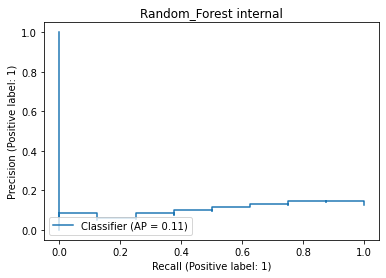

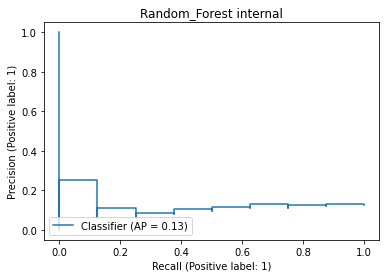

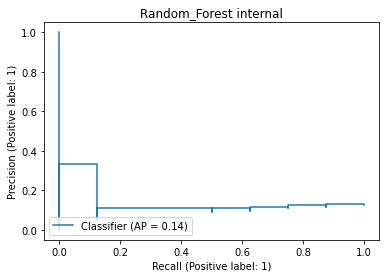

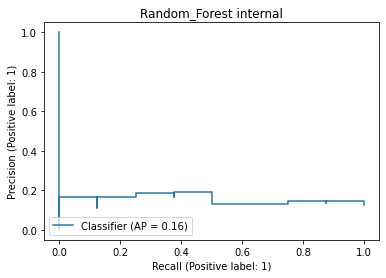

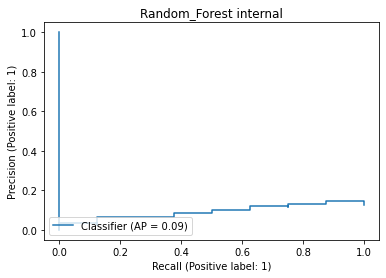

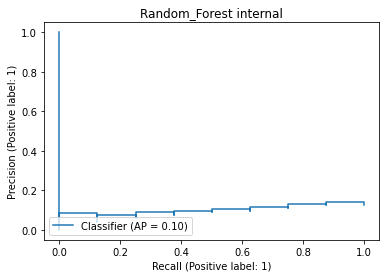

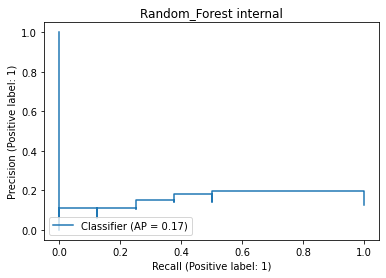

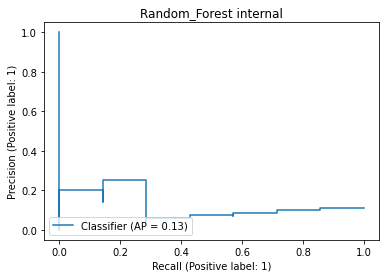

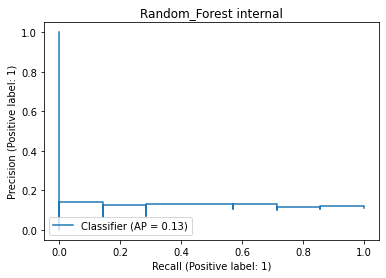

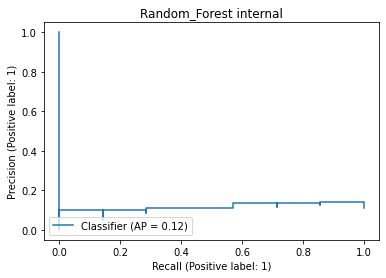

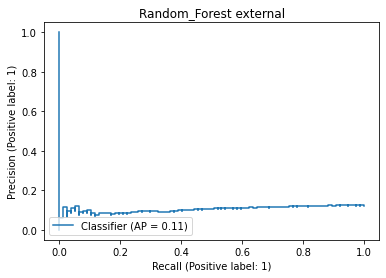

In [39]:
!mkdir 'result_Many_Feature_Selection_notebook/cnv'
create_result_json(result_dict, feature_selection_list_cnv, cnv_file_name, dataset_list, label, datasets)

# Create proteins result using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mne

Running training : 0it [00:00, ?it/s]
Running proteins training :   0%|                         | 0/5 [00:00<?, ?it/s]

TECNICA DI FS check mannwhitneyu
file name result_Many_Feature_Selection_notebook/proteins/proteins.json




Running fold : 0it [00:00, ?it/s]

Running fold : 1it [00:03,  3.07s/it]

Running fold : 2it [00:06,  3.06s/it]

Running fold : 3it [00:09,  3.14s/it]

Running fold : 4it [00:13,  3.38s/it]

Running fold : 5it [00:15,  3.09s/it]

Running fold : 6it [00:18,  3.03s/it]

Running fold : 7it [00:21,  2.95s/it]

Running fold : 8it [00:24,  2.95s/it]

Running fold : 9it [00:27,  2.86s/it]

Running fold : 10it [00:30,  2.94s/it]

                                      
Running proteins training :  20%|███▍             | 1/5 [00:30<02:00, 30.16s/it]

TECNICA DI FS check mannwhitneyu_with_umap
file name result_Many_Feature_Selection_notebook/proteins/proteins.json




Running fold : 0it [00:00, ?it/s]

Running fold : 1it [00:09,  9.09s/it]

Running fold : 2it [00:16,  7.83s/it]

Running fold : 3it [00:23,  7.80s/it]

Running fold : 4it [00:30,  7.39s/it]

Running fold : 5it [00:37,  7.21s/it]

Running fold : 6it [00:44,  7.10s/it]

Running fold : 7it [00:51,  7.04s/it]

Running fold : 8it [00:58,  7.17s/it]

Running fold : 9it [01:06,  7.26s/it]

Running fold : 10it [01:13,  7.16s/it]

                                      
Running proteins training :  40%|██████▊          | 2/5 [01:43<02:46, 55.43s/it]

TECNICA DI FS check boruta
file name result_Many_Feature_Selection_notebook/proteins/proteins.json




Running fold : 0it [00:00, ?it/s]

execute boruta




Running fold : 1it [00:10, 10.56s/it]

execute boruta




Running fold : 2it [00:17,  8.29s/it]

execute boruta




Running fold : 3it [00:24,  8.03s/it]

execute boruta




Running fold : 4it [00:35,  8.84s/it]

execute boruta




Running fold : 5it [00:41,  7.96s/it]

execute boruta




Running fold : 6it [00:47,  7.25s/it]

execute boruta




Running fold : 7it [00:54,  7.27s/it]

execute boruta




Running fold : 8it [01:01,  7.00s/it]

execute boruta




Running fold : 9it [01:10,  7.76s/it]

execute boruta




Running fold : 10it [01:17,  7.47s/it]

                                      
Running proteins training :  60%|██████████▏      | 3/5 [03:00<02:10, 65.45s/it]

TECNICA DI FS check mine
file name result_Many_Feature_Selection_notebook/proteins/proteins.json




Running fold : 0it [00:00, ?it/s]


Running MINE test:   0%|                                | 0/216 [00:00<?, ?it/s]


Running MINE test:  19%|████                  | 40/216 [00:00<00:00, 395.92it/s]


Running MINE test:  37%|████████▏             | 80/216 [00:00<00:00, 395.42it/s]


Running MINE test:  56%|███████████▋         | 120/216 [00:00<00:00, 394.20it/s]


Running MINE test:  74%|███████████████▌     | 160/216 [00:00<00:00, 391.59it/s]


Running MINE test:  93%|███████████████████▍ | 200/216 [00:00<00:00, 392.40it/s]


                                                                                

Running fold : 1it [00:13, 13.69s/it]


Running MINE test:   0%|                                | 0/216 [00:00<?, ?it/s]


Running MINE test:  19%|████                  | 40/216 [00:00<00:00, 395.24it/s]


Running MINE test:  37%|████████▏             | 80/216 [00:00<00:00, 395.34it/s]


Running MINE test:  56%|███████████▋         | 120/216 [00:00<00:00, 392.36it/s]


Running MI

TECNICA DI FS check mrmr
file name result_Many_Feature_Selection_notebook/proteins/proteins.json




Running fold : 0it [00:00, ?it/s]



 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 136 	 PKC-alpha_pS657 	 0.000
2 	 135 	 PKC-alpha 	 0.000
3 	 139 	 PR 	 0.000
4 	 138 	 PKC-pan_BetaII_pS660 	 0.000
5 	 137 	 PKC-delta_pS664 	 0.000
6 	 142 	 PREX1 	 0.000
7 	 144 	 Paxillin 	 0.000
8 	 134 	 PI3K-p85 	 0.000
9 	 133 	 PI3K-p110-alpha 	 0.000
10 	 132 	 PEA15_pS116 	 0.000
11 	 141 	 PRDX1 	 0.000
12 	 130 	 PDK1_pS241 	 0.000
13 	 143 	 PTEN 	 0.000
14 	 150 	 Raptor 	 0.000
15 	 149 	 Rad51 	 0.000
16 	 153 	 Rictor 	 0.000
17 	 152 	 Rb_pS807_S811 	 0.0



Running fold : 1it [15:35, 935.90s/it]

.043
32 	 117 	 Myosin-IIa_pS1943 	 0.043
33 	 123 	 Notch1 	 0.043
34 	 127 	 PCNA 	 0.043
35 	 126 	 PARP_cleaved 	 0.043
36 	 125 	 PAI-1 	 0.043
37 	 128 	 PDCD4 	 0.043
38 	 122 	 NF2 	 0.043
39 	 121 	 NF-kB-p65_pS536 	 0.043
40 	 102 	 JAB1 	 0.043
41 	 157 	 S6_pS240_S244 	 0.043
42 	 198 	 eEF2K 	 0.043
43 	 197 	 eEF2 	 0.043
44 	 201 	 mTOR 	 0.043
45 	 200 	 eIF4G 	 0.043
46 	 203 	 p16_INK4a 	 0.043
47 	 205 	 p27 	 0.043
48 	 196 	 cIAP 	 0.043
49 	 202 	 mTOR_pS2448 	 0.043
50 	 192 	 c-Kit 	 0.043
51 	 204 	 p21 	 0.043
52 	 211 	 p62-LCK-ligand 	 0.043
53 	 210 	 p53 	 0.043
54 	 214 	 p90RSK 	 0.043
55 	 213 	 p70S6K_pT389 	 0.043
56 	 212 	 p70S6K 	 0.043
57 	 190 	 c-Abl 	 0.043
58 	 166 	 Smad1 	 0.043
59 	 165 	 Smac 	 0.043
60 	 174 	 Syk 	 0.043
61 	 163 	 STAT5-alpha 	 0.043
62 	 159 	 SETD2 	 0.043
63 	 179 	 Transglutaminase 	 0.043
64 	 187 	 YB-1 	 0.043
65 	 178 	 TSC1 	 0.043
66 	 177 	 TIGAR 	 0.043
67 	 103 	 JNK2 	 0.043
68 	 36 	 Bcl2A1 	 0.043
69 	 4



Running fold : 2it [31:18, 940.07s/it]

OR_pS2448 	 0.000
66 	 190 	 c-Abl 	 0.000
67 	 211 	 p62-LCK-ligand 	 0.000
68 	 209 	 p38_pT180_Y182 	 0.000
69 	 214 	 p90RSK 	 0.000
70 	 213 	 p70S6K_pT389 	 0.000
71 	 212 	 p70S6K 	 0.000
72 	 189 	 beta-Catenin 	 0.000
73 	 210 	 p53 	 0.000
74 	 205 	 p27 	 0.000
75 	 208 	 p38_MAPK 	 0.000
76 	 207 	 p27_pT198 	 0.000
77 	 206 	 p27_pT157 	 0.000
78 	 191 	 c-Jun_pS73 	 0.000
79 	 108 	 Lck 	 0.000
80 	 170 	 Src 	 0.000
81 	 168 	 Smad4 	 0.000
82 	 173 	 Stathmin 	 0.000
83 	 172 	 Src_pY527 	 0.000
84 	 171 	 Src_pY416 	 0.000
85 	 175 	 TAZ 	 0.000
86 	 169 	 Snail 	 0.000
87 	 177 	 TIGAR 	 0.000
88 	 167 	 Smad3 	 0.000
89 	 166 	 Smad1 	 0.000
90 	 165 	 Smac 	 0.000
91 	 174 	 Syk 	 0.000
92 	 164 	 Shc_pY317 	 0.000
93 	 184 	 XRCC1 	 0.000
94 	 182 	 VEGFR2 	 0.000
95 	 187 	 YB-1 	 0.000
96 	 186 	 YAP_pS127 	 0.000
97 	 185 	 YAP 	 0.000
98 	 188 	 YB-1_pS102 	 0.000
99 	 183 	 XBP1 	 0.000
100 	 178 	 TSC1 	 0.000

*** mRMR features *** 
Order 	 Fea 	 Name 	 Scor



Running fold : 3it [46:12, 918.96s/it]

B-1 	 0.043
45 	 198 	 eEF2K 	 0.043
46 	 210 	 p53 	 0.043
47 	 214 	 p90RSK 	 0.043
48 	 213 	 p70S6K_pT389 	 0.043
49 	 212 	 p70S6K 	 0.043
50 	 201 	 mTOR 	 0.043
51 	 205 	 p27 	 0.043
52 	 203 	 p16_INK4a 	 0.043
53 	 184 	 XRCC1 	 0.043
54 	 165 	 Smac 	 0.043
55 	 163 	 STAT5-alpha 	 0.043
56 	 170 	 Src 	 0.043
57 	 159 	 SETD2 	 0.043
58 	 158 	 SCD 	 0.043
59 	 157 	 S6_pS240_S244 	 0.043
60 	 166 	 Smad1 	 0.043
61 	 156 	 S6_pS235_S236 	 0.043
62 	 177 	 TIGAR 	 0.043
63 	 179 	 Transglutaminase 	 0.043
64 	 178 	 TSC1 	 0.043
65 	 181 	 Tuberin_pT1462 	 0.043
66 	 174 	 Syk 	 0.043
67 	 101 	 IRS1 	 0.043
68 	 99 	 INPP4B 	 0.043
69 	 32 	 Bap1-c-4 	 0.043
70 	 39 	 Bim 	 0.043
71 	 28 	 BRCA2 	 0.043
72 	 36 	 Bcl2A1 	 0.043
73 	 26 	 B-Raf 	 0.043
74 	 40 	 C-Raf 	 0.043
75 	 48 	 COG3 	 0.043
76 	 45 	 CD49b 	 0.043
77 	 49 	 Caspase-3 	 0.043
78 	 46 	 CDK1 	 0.043
79 	 43 	 CD26 	 0.043
80 	 27 	 B-Raf_pS445 	 0.043
81 	 9 	 A-Raf_pS299 	 0.043
82 	 12 	 ACVRL1 	 0.



Running fold : 4it [1:01:03, 907.78s/it]

 p27_pT198 	 0.000
77 	 206 	 p27_pT157 	 0.000
78 	 192 	 c-Kit 	 0.000
79 	 108 	 Lck 	 0.000
80 	 172 	 Src_pY527 	 0.000
81 	 170 	 Src 	 0.000
82 	 175 	 TAZ 	 0.000
83 	 174 	 Syk 	 0.000
84 	 173 	 Stathmin 	 0.000
85 	 177 	 TIGAR 	 0.000
86 	 171 	 Src_pY416 	 0.000
87 	 178 	 TSC1 	 0.000
88 	 169 	 Snail 	 0.000
89 	 168 	 Smad4 	 0.000
90 	 167 	 Smad3 	 0.000
91 	 176 	 TFRC 	 0.000
92 	 166 	 Smad1 	 0.000
93 	 185 	 YAP 	 0.000
94 	 183 	 XBP1 	 0.000
95 	 188 	 YB-1_pS102 	 0.000
96 	 187 	 YB-1 	 0.000
97 	 186 	 YAP_pS127 	 0.000
98 	 189 	 beta-Catenin 	 0.000
99 	 184 	 XRCC1 	 0.000
100 	 179 	 Transglutaminase 	 0.000

*** mRMR features *** 
Order 	 Fea 	 Name 	 Score
1 	 142 	 PREX1 	 0.000
2 	 140 	 PRAS40_pT246 	 0.043
3 	 145 	 RBM15 	 0.043
4 	 144 	 Paxillin 	 0.043
5 	 143 	 PTEN 	 0.043
6 	 148 	 Rad50 	 0.043
7 	 141 	 PRDX1 	 0.043
8 	 149 	 Rad51 	 0.043
9 	 139 	 PR 	 0.043
10 	 138 	 PKC-pan_BetaII_pS660 	 0.043
11 	 137 	 PKC-delta_pS664 	 0.043
12 	



Running fold : 5it [1:15:48, 899.54s/it]

5 	 197 	 eEF2 	 0.000
56 	 195 	 c-Myc 	 0.000
57 	 200 	 eIF4G 	 0.000
58 	 199 	 eIF4E 	 0.000
59 	 198 	 eEF2K 	 0.000
60 	 202 	 mTOR_pS2448 	 0.000
61 	 196 	 cIAP 	 0.000
62 	 204 	 p21 	 0.000
63 	 194 	 c-Met_pY1235 	 0.000
64 	 193 	 c-Met 	 0.000
65 	 192 	 c-Kit 	 0.000
66 	 201 	 mTOR 	 0.000
67 	 190 	 c-Abl 	 0.000
68 	 203 	 p16_INK4a 	 0.000
69 	 211 	 p62-LCK-ligand 	 0.000
70 	 209 	 p38_pT180_Y182 	 0.000
71 	 214 	 p90RSK 	 0.000
72 	 213 	 p70S6K_pT389 	 0.000
73 	 212 	 p70S6K 	 0.000
74 	 189 	 beta-Catenin 	 0.000
75 	 210 	 p53 	 0.000
76 	 205 	 p27 	 0.000
77 	 208 	 p38_MAPK 	 0.000
78 	 207 	 p27_pT198 	 0.000
79 	 206 	 p27_pT157 	 0.000
80 	 191 	 c-Jun_pS73 	 0.000
81 	 108 	 Lck 	 0.000
82 	 170 	 Src 	 0.000
83 	 168 	 Smad4 	 0.000
84 	 173 	 Stathmin 	 0.000
85 	 172 	 Src_pY527 	 0.000
86 	 171 	 Src_pY416 	 0.000
87 	 175 	 TAZ 	 0.000
88 	 169 	 Snail 	 0.000
89 	 177 	 TIGAR 	 0.000
90 	 167 	 Smad3 	 0.000
91 	 166 	 Smad1 	 0.000
92 	 165 	 Sm



Running fold : 6it [1:30:36, 895.62s/it]

	 0.000
88 	 175 	 TAZ 	 0.000
89 	 182 	 VEGFR2 	 0.000
90 	 181 	 Tuberin_pT1462 	 0.000
91 	 185 	 YAP 	 0.000
92 	 184 	 XRCC1 	 0.000
93 	 183 	 XBP1 	 0.000
94 	 186 	 YAP_pS127 	 0.000
95 	 177 	 TIGAR 	 0.000
96 	 180 	 Tuberin 	 0.000
97 	 179 	 Transglutaminase 	 0.000
98 	 178 	 TSC1 	 0.000
99 	 103 	 JNK2 	 0.000
100 	 1 	 14-3-3_epsilon 	 0.000

*** mRMR features *** 
Order 	 Fea 	 Name 	 Score
1 	 141 	 PRDX1 	 0.000
2 	 140 	 PRAS40_pT246 	 0.043
3 	 145 	 RBM15 	 0.043
4 	 143 	 PTEN 	 0.043
5 	 142 	 PREX1 	 0.043
6 	 147 	 Rab25 	 0.043
7 	 149 	 Rad51 	 0.043
8 	 139 	 PR 	 0.043
9 	 138 	 PKC-pan_BetaII_pS660 	 0.043
10 	 137 	 PKC-delta_pS664 	 0.043
11 	 146 	 Rab11 	 0.043
12 	 135 	 PKC-alpha 	 0.043
13 	 148 	 Rad50 	 0.043
14 	 155 	 S6 	 0.043
15 	 154 	 Rictor_pT1135 	 0.043
16 	 158 	 SCD 	 0.043
17 	 157 	 S6_pS240_S244 	 0.043
18 	 156 	 S6_pS235_S236 	 0.043
19 	 133 	 PI3K-p110-alpha 	 0.043
20 	 150 	 Raptor 	 0.043
21 	 153 	 Rictor 	 0.043
22 	 152 



Running fold : 7it [1:45:24, 893.16s/it]

 	 103 	 JNK2 	 0.043
69 	 35 	 Bcl-xL 	 0.043
70 	 39 	 Bim 	 0.043
71 	 43 	 CD26 	 0.043
72 	 36 	 Bcl2A1 	 0.043
73 	 28 	 BRCA2 	 0.043
74 	 49 	 Caspase-3 	 0.043
75 	 101 	 IRS1 	 0.043
76 	 27 	 B-Raf_pS445 	 0.043
77 	 45 	 CD49b 	 0.043
78 	 48 	 COG3 	 0.043
79 	 47 	 CDK1_pY15 	 0.043
80 	 46 	 CDK1 	 0.043
81 	 11 	 ACC_pS79 	 0.043
82 	 9 	 A-Raf_pS299 	 0.043
83 	 14 	 AMPK_alpha 	 0.043
84 	 3 	 4E-BP1 	 0.043
85 	 12 	 ACVRL1 	 0.043
86 	 22 	 Akt_pS473 	 0.043
87 	 26 	 B-Raf 	 0.043
88 	 21 	 Akt 	 0.043
89 	 15 	 AMPK_pT172 	 0.043
90 	 16 	 AR 	 0.043
91 	 55 	 Chk1_pS345 	 0.043
92 	 81 	 FOXO3a_pS318_S321 	 0.043
93 	 85 	 GAB2 	 0.043
94 	 89 	 GSK3-alpha-beta_pS21_S9 	 0.043
95 	 80 	 FOXO3a 	 0.043
96 	 79 	 FASN 	 0.043
97 	 78 	 ETS-1 	 0.043
98 	 100 	 IRF-1 	 0.043
99 	 99 	 INPP4B 	 0.043
100 	 98 	 IGFBP2 	 0.043


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.pe



Running fold : 8it [2:00:09, 890.60s/it]

0.000
100 	 174 	 Syk 	 0.000

*** mRMR features *** 
Order 	 Fea 	 Name 	 Score
1 	 137 	 PKC-delta_pS664 	 0.000
2 	 136 	 PKC-alpha_pS657 	 0.043
3 	 140 	 PRAS40_pT246 	 0.043
4 	 139 	 PR 	 0.043
5 	 143 	 PTEN 	 0.043
6 	 145 	 RBM15 	 0.043
7 	 135 	 PKC-alpha 	 0.043
8 	 134 	 PI3K-p85 	 0.043
9 	 133 	 PI3K-p110-alpha 	 0.043
10 	 142 	 PREX1 	 0.043
11 	 131 	 PEA15 	 0.043
12 	 144 	 Paxillin 	 0.043
13 	 151 	 Rb 	 0.043
14 	 150 	 Raptor 	 0.043
15 	 154 	 Rictor_pT1135 	 0.043
16 	 153 	 Rictor 	 0.043
17 	 152 	 Rb_pS807_S811 	 0.043
18 	 149 	 Rad51 	 0.043
19 	 148 	 Rad50 	 0.043
20 	 147 	 Rab25 	 0.043
21 	 132 	 PEA15_pS116 	 0.043
22 	 156 	 S6_pS235_S236 	 0.043
23 	 130 	 PDK1_pS241 	 0.043
24 	 109 	 MAPK_pT202_Y204 	 0.043
25 	 113 	 MSH2 	 0.043
26 	 112 	 MIG-6 	 0.043
27 	 117 	 Myosin-IIa_pS1943 	 0.043
28 	 2 	 14-3-3_zeta 	 0.043
29 	 107 	 LKB1 	 0.043
30 	 106 	 Ku80 	 0.043
31 	 114 	 MSH6 	 0.043
32 	 158 	 SCD 	 0.043
33 	 116 	 Mre11 	 0.043
34 	 1



Running fold : 9it [2:14:54, 888.79s/it]

3
80 	 15 	 AMPK_pT172 	 0.043
81 	 16 	 AR 	 0.043
82 	 3 	 4E-BP1 	 0.043
83 	 14 	 AMPK_alpha 	 0.043
84 	 23 	 Akt_pT308 	 0.043
85 	 21 	 Akt 	 0.043
86 	 27 	 B-Raf_pS445 	 0.043
87 	 26 	 B-Raf 	 0.043
88 	 28 	 BRCA2 	 0.043
89 	 55 	 Chk1_pS345 	 0.043
90 	 100 	 IRF-1 	 0.043
91 	 92 	 HER2_pY1248 	 0.043
92 	 78 	 ETS-1 	 0.043
93 	 74 	 ER-alpha_pS118 	 0.043
94 	 73 	 ER-alpha 	 0.043
95 	 79 	 FASN 	 0.043
96 	 71 	 EGFR_pY1173 	 0.043
97 	 89 	 GSK3-alpha-beta_pS21_S9 	 0.043
98 	 80 	 FOXO3a 	 0.043
99 	 72 	 EPPK1 	 0.043
100 	 85 	 GAB2 	 0.043


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 



Running fold : 10it [2:29:42, 888.58s/it]

                                         
Running proteins training : 100%|█████████████| 5/5 [2:35:07<00:00, 3301.03s/it]


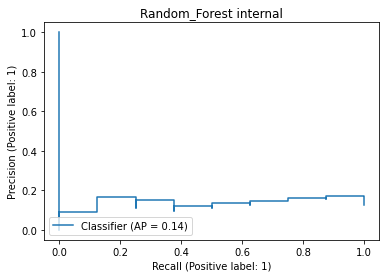

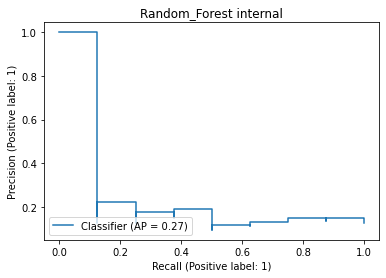

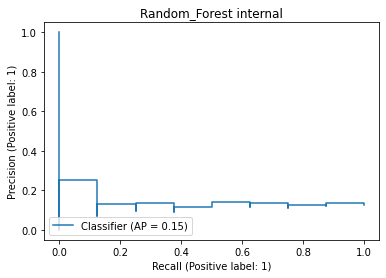

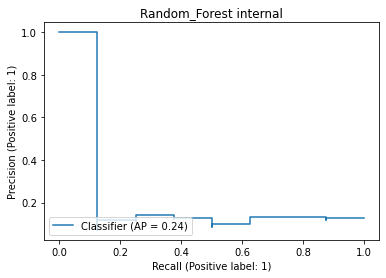

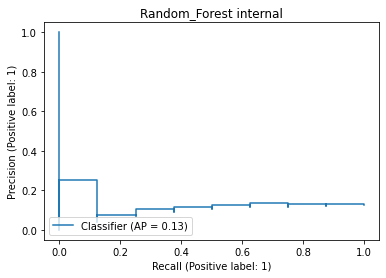

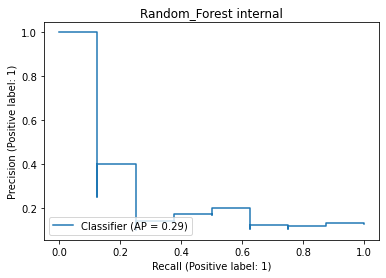

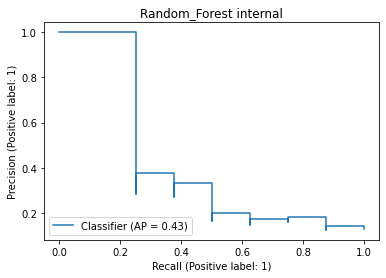

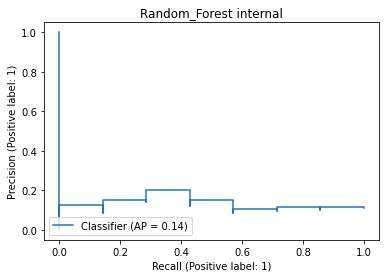

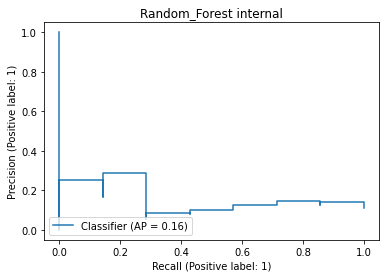

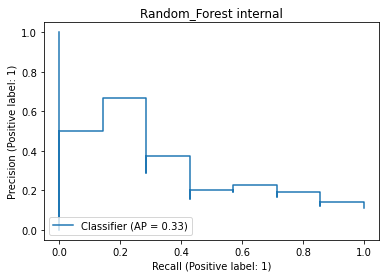

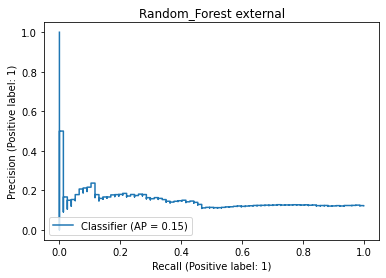

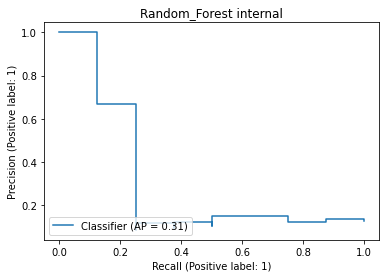

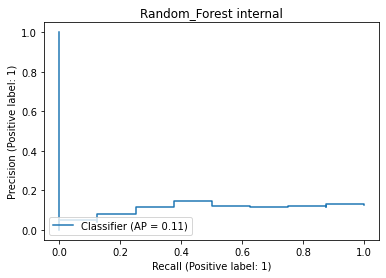

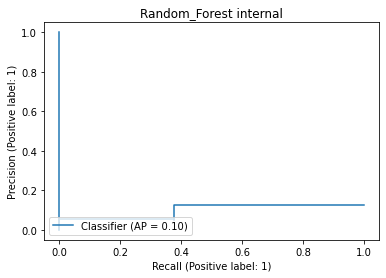

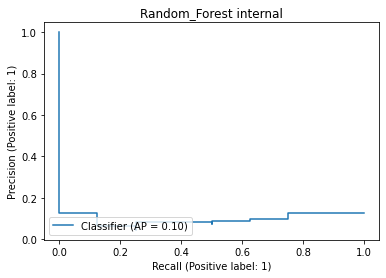

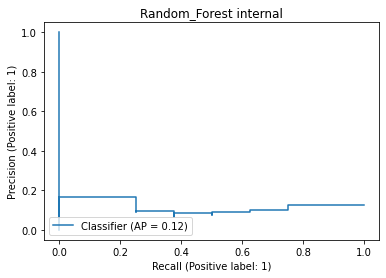

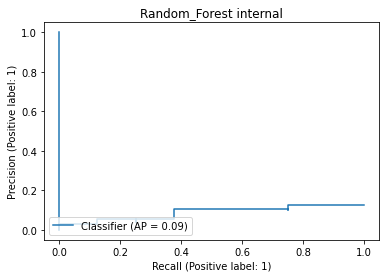

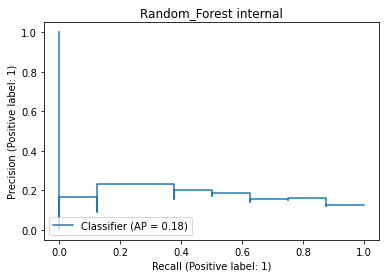

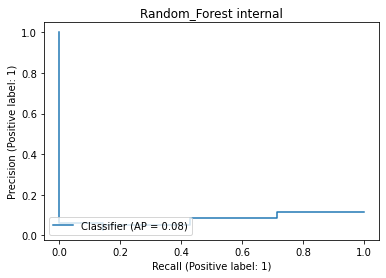

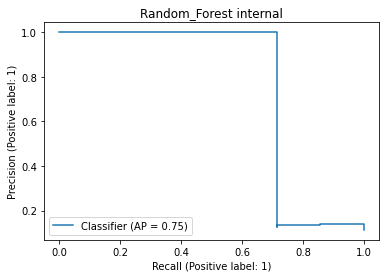

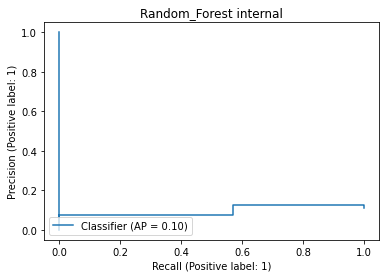

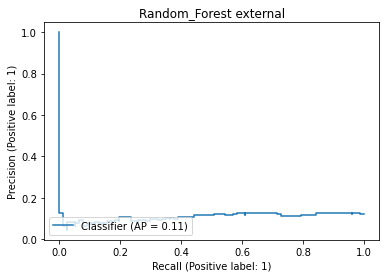

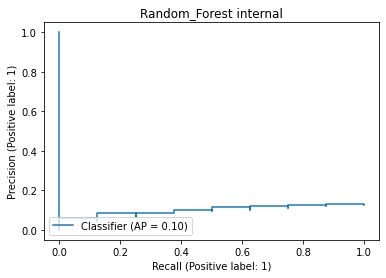

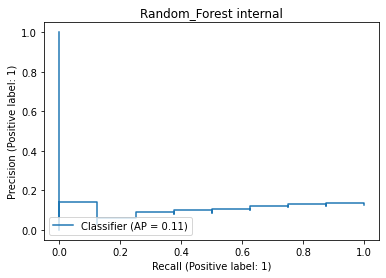

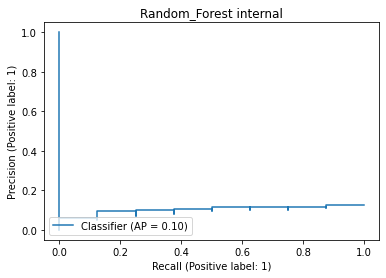

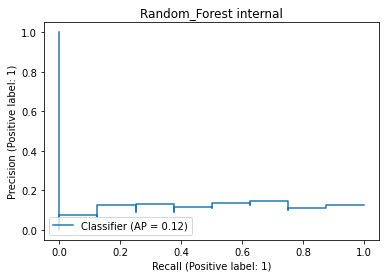

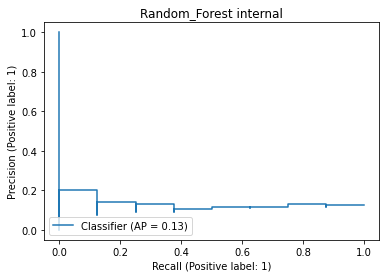

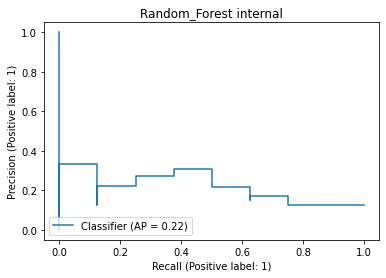

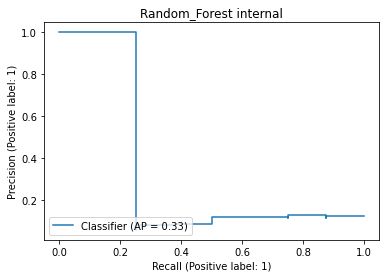

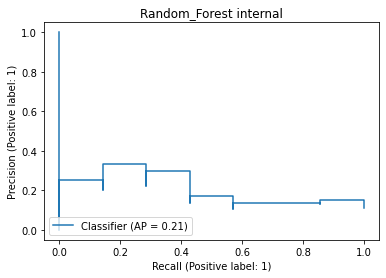

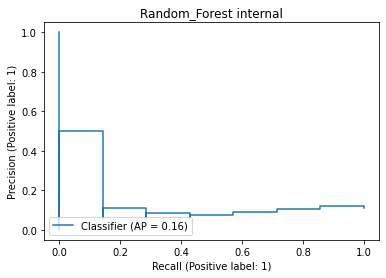

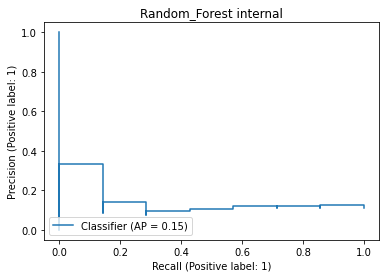

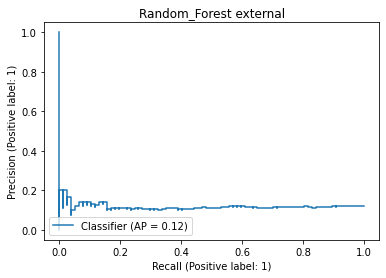

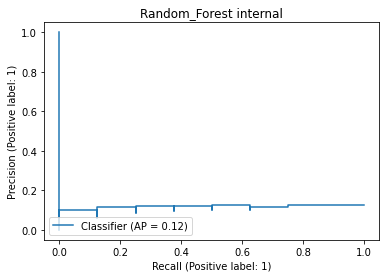

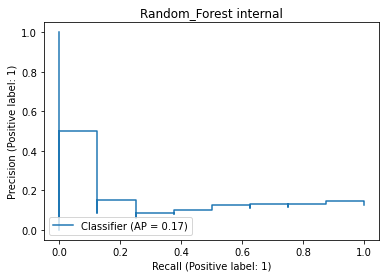

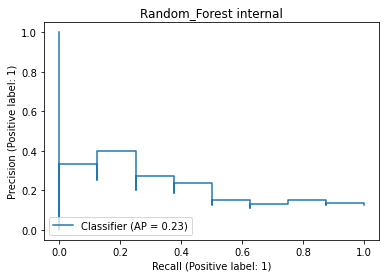

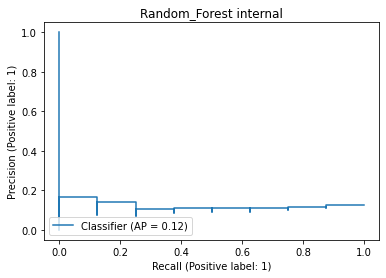

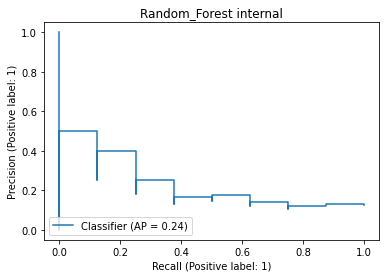

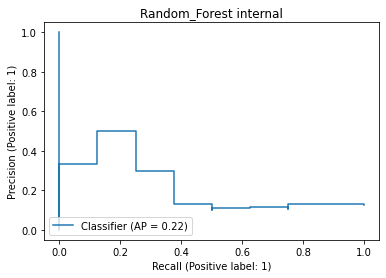

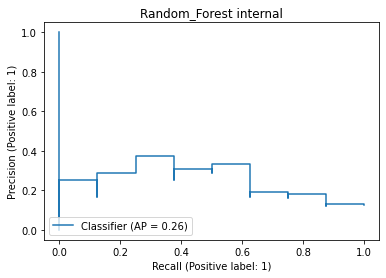

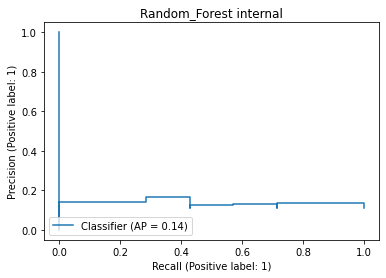

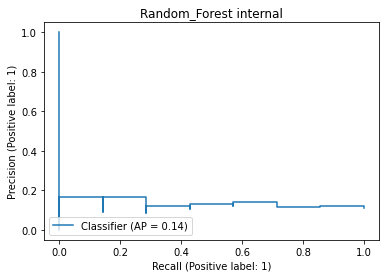

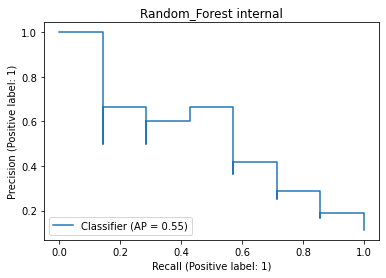

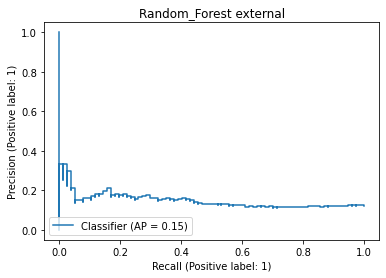

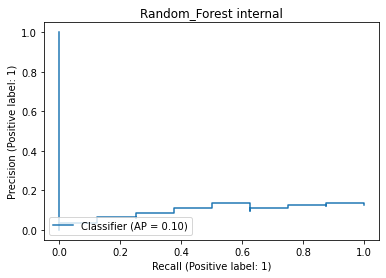

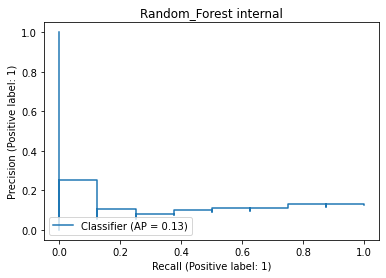

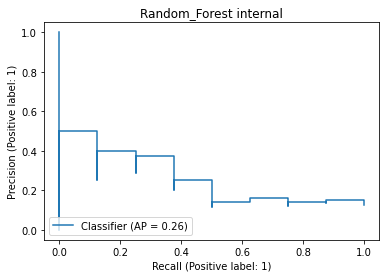

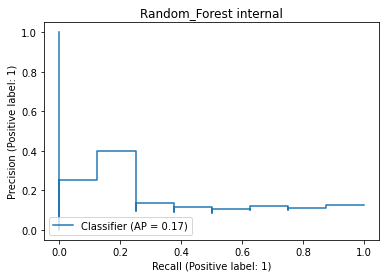

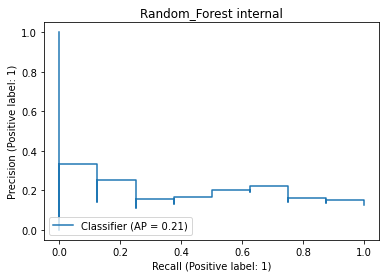

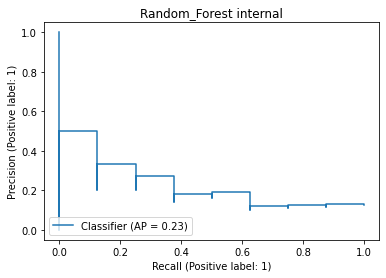

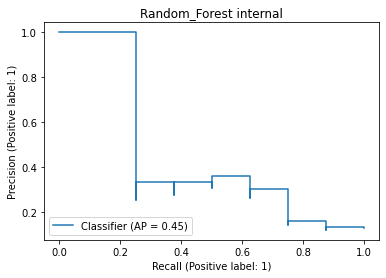

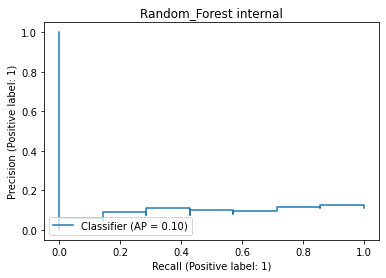

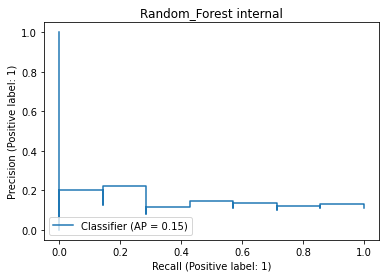

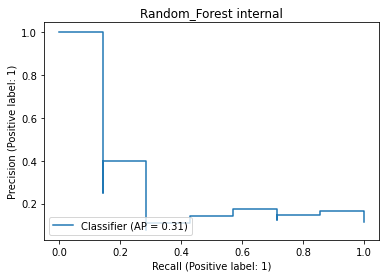

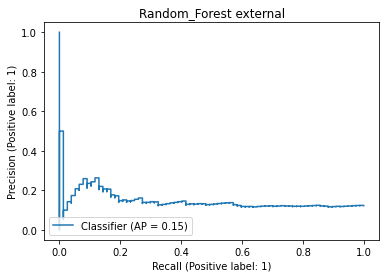

In [40]:
dataset_list = ['proteins']
proteins_file_name = ['result_Many_Feature_Selection_notebook/proteins/proteins.json']
feature_selection_list = ['mannwhitneyu','mannwhitneyu_with_umap', 'boruta', 'mine', 'mrmr']


!mkdir 'result_Many_Feature_Selection_notebook/proteins'
create_result_json(result_dict, feature_selection_list, proteins_file_name, dataset_list, label, datasets)

# Create mRNA result using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mine, boruta

Running training : 0it [00:00, ?it/s]
Running mrna training :   0%|                             | 0/4 [00:00<?, ?it/s]

TECNICA DI FS check mannwhitneyu
file name result_Many_Feature_Selection_notebook/mrna/mrna.json




Running fold : 0it [00:00, ?it/s]

Running fold : 1it [02:14, 134.14s/it]

Running fold : 2it [04:47, 145.35s/it]

Running fold : 3it [06:39, 130.20s/it]

Running fold : 4it [08:47, 129.40s/it]

Running fold : 5it [09:48, 104.56s/it]

Running fold : 6it [11:19, 99.90s/it] 

Running fold : 7it [12:57, 99.46s/it]

Running fold : 8it [15:00, 106.83s/it]

Running fold : 9it [16:25, 99.95s/it] 

Running fold : 10it [17:17, 85.32s/it]

                                      
Running mrna training :  25%|██████████                              | 1/4 [17:17<51:52, 1037.65s/it]

TECNICA DI FS check mannwhitneyu_with_umap
file name result_Many_Feature_Selection_notebook/mrna/mrna.json




Running fold : 0it [00:00, ?it/s]

Running fold : 1it [00:09,  9.38s/it]

Running fold : 2it [00:18,  9.25s/it]

Running fold : 3it [00:26,  8.85s/it]

Running fold : 4it [00:35,  8.93s/it]

Running fold : 5it [00:45,  8.98s/it]

Running fold : 6it [00:54,  9.05s/it]

Running fold : 7it [01:03,  9.09s/it]

Running fold : 8it [01:12,  9.13s/it]

Running fold : 9it [01:21,  9.16s/it]

Running fold : 10it [01:30,  9.12s/it]

                                      
Running mrna training :  50%|████████████████████▌                    | 2/4 [18:48<16:01, 480.74s/it]

TECNICA DI FS check boruta
file name result_Many_Feature_Selection_notebook/mrna/mrna.json




Running fold : 0it [00:00, ?it/s]

execute boruta




Running fold : 1it [00:45, 45.35s/it]

execute boruta




Running fold : 2it [01:32, 46.46s/it]

execute boruta




Running fold : 3it [02:21, 47.39s/it]

execute boruta




Running fold : 4it [03:08, 47.32s/it]

execute boruta




Running fold : 5it [03:55, 47.18s/it]

execute boruta




Running fold : 6it [04:42, 47.10s/it]

execute boruta




Running fold : 7it [05:28, 46.98s/it]

execute boruta




Running fold : 8it [06:20, 48.41s/it]

execute boruta




Running fold : 9it [07:10, 49.09s/it]

execute boruta




Running fold : 10it [08:00, 49.15s/it]

                                      
Running mrna training :  75%|██████████████████████████████▊          | 3/4 [26:48<08:00, 480.55s/it]

TECNICA DI FS check mine
file name result_Many_Feature_Selection_notebook/mrna/mrna.json




Running fold : 0it [00:00, ?it/s]


Running MINE test:   0%|                                                   | 0/18465 [00:00<?, ?it/s]


Running MINE test:   0%|                                         | 49/18465 [00:00<00:38, 481.71it/s]


Running MINE test:   1%|▏                                        | 98/18465 [00:00<00:39, 464.39it/s]


Running MINE test:   1%|▎                                       | 145/18465 [00:00<00:39, 463.99it/s]


Running MINE test:   1%|▍                                       | 200/18465 [00:00<00:36, 496.10it/s]


Running MINE test:   1%|▌                                       | 250/18465 [00:00<00:37, 487.97it/s]


Running MINE test:   2%|▋                                       | 299/18465 [00:00<00:38, 476.21it/s]


Running MINE test:   2%|▊                                       | 347/18465 [00:00<00:39, 464.18it/s]


Running MINE test:   2%|▊                                       | 394/18465 [00:00<00:39, 461.37it/s]


Running MINE test:   2%|▉ 

Running MINE test:  20%|███████▌                               | 3609/18465 [00:07<00:30, 479.52it/s]


Running MINE test:  20%|███████▋                               | 3658/18465 [00:07<00:31, 475.47it/s]


Running MINE test:  20%|███████▊                               | 3706/18465 [00:07<00:31, 470.69it/s]


Running MINE test:  20%|███████▉                               | 3754/18465 [00:07<00:32, 454.42it/s]


Running MINE test:  21%|████████                               | 3800/18465 [00:07<00:32, 449.60it/s]


Running MINE test:  21%|████████▏                              | 3850/18465 [00:08<00:31, 463.87it/s]


Running MINE test:  21%|████████▏                              | 3897/18465 [00:08<00:31, 462.22it/s]


Running MINE test:  21%|████████▎                              | 3949/18465 [00:08<00:30, 477.53it/s]


Running MINE test:  22%|████████▍                              | 4001/18465 [00:08<00:29, 488.26it/s]


Running MINE test:  22%|████████▌                              |

Running MINE test:  39%|███████████████▎                       | 7273/18465 [00:15<00:22, 491.88it/s]


Running MINE test:  40%|███████████████▍                       | 7323/18465 [00:15<00:22, 493.85it/s]


Running MINE test:  40%|███████████████▌                       | 7376/18465 [00:15<00:22, 501.14it/s]


Running MINE test:  40%|███████████████▋                       | 7427/18465 [00:15<00:22, 493.59it/s]


Running MINE test:  41%|███████████████▊                       | 7481/18465 [00:15<00:21, 503.03it/s]


Running MINE test:  41%|███████████████▉                       | 7535/18465 [00:15<00:21, 510.64it/s]


Running MINE test:  41%|████████████████                       | 7587/18465 [00:15<00:21, 499.12it/s]


Running MINE test:  41%|████████████████▏                      | 7640/18465 [00:15<00:21, 507.29it/s]


Running MINE test:  42%|████████████████▎                      | 7700/18465 [00:16<00:20, 531.63it/s]


Running MINE test:  42%|████████████████▍                      |

Running MINE test:  60%|██████████████████████▊               | 11070/18465 [00:23<00:16, 450.15it/s]


Running MINE test:  60%|██████████████████████▉               | 11118/18465 [00:23<00:16, 457.76it/s]


Running MINE test:  60%|██████████████████████▉               | 11168/18465 [00:23<00:15, 467.00it/s]


Running MINE test:  61%|███████████████████████▎              | 11327/18465 [00:23<00:09, 791.93it/s]


Running MINE test:  62%|███████████████████████              | 11495/18465 [00:23<00:06, 1046.10it/s]


Running MINE test:  63%|███████████████████████▊              | 11601/18465 [00:23<00:08, 791.16it/s]


Running MINE test:  63%|████████████████████████              | 11691/18465 [00:23<00:10, 663.52it/s]


Running MINE test:  64%|████████████████████████▏             | 11768/18465 [00:24<00:11, 593.34it/s]


Running MINE test:  64%|████████████████████████▎             | 11835/18465 [00:24<00:12, 545.67it/s]


Running MINE test:  64%|████████████████████████▍             | 

Running MINE test:  81%|██████████████████████████████▊       | 14948/18465 [00:30<00:07, 494.28it/s]


Running MINE test:  81%|██████████████████████████████▊       | 14998/18465 [00:31<00:07, 472.19it/s]


Running MINE test:  82%|███████████████████████████████       | 15075/18465 [00:31<00:06, 556.55it/s]


Running MINE test:  82%|███████████████████████████████▏      | 15132/18465 [00:31<00:06, 481.48it/s]


Running MINE test:  82%|███████████████████████████████▏      | 15183/18465 [00:31<00:07, 461.49it/s]


Running MINE test:  82%|███████████████████████████████▎      | 15231/18465 [00:31<00:06, 464.99it/s]


Running MINE test:  83%|███████████████████████████████▍      | 15291/18465 [00:31<00:06, 500.59it/s]


Running MINE test:  83%|███████████████████████████████▌      | 15347/18465 [00:31<00:06, 514.01it/s]


Running MINE test:  83%|███████████████████████████████▋      | 15400/18465 [00:31<00:05, 510.99it/s]


Running MINE test:  84%|███████████████████████████████▊      | 

Running MINE test: 100%|█████████████████████████████████████▊| 18391/18465 [00:38<00:00, 396.96it/s]


Running MINE test: 100%|█████████████████████████████████████▉| 18438/18465 [00:38<00:00, 416.68it/s]


                                                                                                     

Running fold : 1it [14:42, 882.82s/it]


Running MINE test:   0%|                                                   | 0/18465 [00:00<?, ?it/s]


Running MINE test:   0%|                                         | 49/18465 [00:00<00:37, 487.15it/s]


Running MINE test:   1%|▏                                        | 98/18465 [00:00<00:39, 463.72it/s]


Running MINE test:   1%|▎                                       | 145/18465 [00:00<00:39, 464.29it/s]


Running MINE test:   1%|▍                                       | 200/18465 [00:00<00:36, 495.90it/s]


Running MINE test:   1%|▌                                       | 250/18465 [00:00<00:37, 487.08it/s]


Running MINE test:   2%|

Running MINE test:  19%|███████▎                               | 3449/18465 [00:07<00:32, 466.96it/s]


Running MINE test:  19%|███████▍                               | 3496/18465 [00:07<00:32, 454.81it/s]


Running MINE test:  19%|███████▌                               | 3552/18465 [00:07<00:30, 484.44it/s]


Running MINE test:  20%|███████▌                               | 3601/18465 [00:07<00:31, 478.42it/s]


Running MINE test:  20%|███████▋                               | 3650/18465 [00:07<00:30, 478.76it/s]


Running MINE test:  20%|███████▊                               | 3699/18465 [00:07<00:31, 474.60it/s]


Running MINE test:  20%|███████▉                               | 3747/18465 [00:07<00:32, 458.84it/s]


Running MINE test:  21%|████████                               | 3794/18465 [00:07<00:32, 446.82it/s]


Running MINE test:  21%|████████                               | 3845/18465 [00:08<00:31, 463.63it/s]


Running MINE test:  21%|████████▏                              |

Running MINE test:  38%|██████████████▉                        | 7064/18465 [00:14<00:23, 476.94it/s]


Running MINE test:  39%|███████████████                        | 7121/18465 [00:14<00:22, 501.93it/s]


Running MINE test:  39%|███████████████▏                       | 7186/18465 [00:15<00:20, 542.97it/s]


Running MINE test:  39%|███████████████▎                       | 7241/18465 [00:15<00:21, 511.65it/s]


Running MINE test:  39%|███████████████▍                       | 7293/18465 [00:15<00:22, 498.82it/s]


Running MINE test:  40%|███████████████▌                       | 7346/18465 [00:15<00:22, 504.52it/s]


Running MINE test:  40%|███████████████▌                       | 7397/18465 [00:15<00:22, 500.08it/s]


Running MINE test:  40%|███████████████▋                       | 7451/18465 [00:15<00:21, 507.91it/s]


Running MINE test:  41%|███████████████▊                       | 7502/18465 [00:15<00:22, 481.96it/s]


Running MINE test:  41%|███████████████▉                       |

Running MINE test:  59%|██████████████████████▍               | 10910/18465 [00:22<00:15, 472.86it/s]


Running MINE test:  59%|██████████████████████▌               | 10962/18465 [00:22<00:15, 485.61it/s]


Running MINE test:  60%|██████████████████████▋               | 11011/18465 [00:22<00:15, 469.32it/s]


Running MINE test:  60%|██████████████████████▊               | 11059/18465 [00:23<00:16, 459.30it/s]


Running MINE test:  60%|██████████████████████▊               | 11106/18465 [00:23<00:16, 443.63it/s]


Running MINE test:  60%|██████████████████████▉               | 11162/18465 [00:23<00:15, 473.93it/s]


Running MINE test:  61%|███████████████████████▏              | 11281/18465 [00:23<00:10, 677.63it/s]


Running MINE test:  62%|███████████████████████              | 11489/18465 [00:23<00:06, 1080.82it/s]


Running MINE test:  63%|███████████████████████▊              | 11600/18465 [00:23<00:08, 800.04it/s]


Running MINE test:  63%|████████████████████████              | 

Running MINE test:  80%|██████████████████████████████▍       | 14817/18465 [00:30<00:07, 468.20it/s]


Running MINE test:  81%|██████████████████████████████▌       | 14870/18465 [00:30<00:07, 485.51it/s]


Running MINE test:  81%|██████████████████████████████▋       | 14926/18465 [00:30<00:07, 505.28it/s]


Running MINE test:  81%|██████████████████████████████▊       | 14977/18465 [00:31<00:07, 473.20it/s]


Running MINE test:  81%|██████████████████████████████▉       | 15025/18465 [00:31<00:07, 469.81it/s]


Running MINE test:  82%|███████████████████████████████▏      | 15129/18465 [00:31<00:05, 630.65it/s]


Running MINE test:  82%|███████████████████████████████▎      | 15194/18465 [00:31<00:05, 548.26it/s]


Running MINE test:  83%|███████████████████████████████▍      | 15252/18465 [00:31<00:05, 553.65it/s]


Running MINE test:  83%|███████████████████████████████▌      | 15310/18465 [00:31<00:05, 536.39it/s]


Running MINE test:  83%|███████████████████████████████▋      | 

Running MINE test:  99%|█████████████████████████████████████▊| 18354/18465 [00:38<00:00, 416.21it/s]


Running MINE test: 100%|█████████████████████████████████████▊| 18398/18465 [00:38<00:00, 420.37it/s]


Running MINE test: 100%|█████████████████████████████████████▉| 18446/18465 [00:38<00:00, 437.54it/s]


                                                                                                     

Running fold : 2it [29:15, 876.92s/it]


Running MINE test:   0%|                                                   | 0/18465 [00:00<?, ?it/s]


Running MINE test:   0%|                                         | 49/18465 [00:00<00:37, 486.32it/s]


Running MINE test:   1%|▏                                        | 98/18465 [00:00<00:39, 461.37it/s]


Running MINE test:   1%|▎                                       | 145/18465 [00:00<00:39, 462.08it/s]


Running MINE test:   1%|▍                                       | 199/18465 [00:00<00:37, 491.95it/s]


Running MINE test:   1%|

Running MINE test:  18%|███████▏                               | 3381/18465 [00:07<00:33, 456.80it/s]


Running MINE test:  19%|███████▏                               | 3430/18465 [00:07<00:32, 464.74it/s]


Running MINE test:  19%|███████▎                               | 3477/18465 [00:07<00:33, 451.15it/s]


Running MINE test:  19%|███████▍                               | 3532/18465 [00:07<00:31, 479.10it/s]


Running MINE test:  19%|███████▌                               | 3581/18465 [00:07<00:31, 478.68it/s]


Running MINE test:  20%|███████▋                               | 3630/18465 [00:07<00:30, 479.30it/s]


Running MINE test:  20%|███████▊                               | 3679/18465 [00:07<00:31, 465.28it/s]


Running MINE test:  20%|███████▊                               | 3727/18465 [00:07<00:31, 467.68it/s]


Running MINE test:  20%|███████▉                               | 3774/18465 [00:07<00:33, 442.93it/s]


Running MINE test:  21%|████████                               |

Running MINE test:  38%|██████████████▊                        | 7011/18465 [00:14<00:24, 467.63it/s]


Running MINE test:  38%|██████████████▉                        | 7059/18465 [00:14<00:24, 459.21it/s]


Running MINE test:  39%|███████████████                        | 7116/18465 [00:14<00:23, 489.38it/s]


Running MINE test:  39%|███████████████▏                       | 7181/18465 [00:15<00:21, 534.60it/s]


Running MINE test:  39%|███████████████▎                       | 7236/18465 [00:15<00:22, 507.13it/s]


Running MINE test:  39%|███████████████▍                       | 7288/18465 [00:15<00:22, 493.33it/s]


Running MINE test:  40%|███████████████▌                       | 7341/18465 [00:15<00:22, 500.52it/s]


Running MINE test:  40%|███████████████▌                       | 7392/18465 [00:15<00:22, 497.20it/s]


Running MINE test:  40%|███████████████▋                       | 7445/18465 [00:15<00:21, 504.13it/s]


Running MINE test:  41%|███████████████▊                       |

Running MINE test:  58%|██████████████████████▏               | 10793/18465 [00:22<00:17, 446.81it/s]


Running MINE test:  59%|██████████████████████▎               | 10853/18465 [00:22<00:15, 488.70it/s]


Running MINE test:  59%|██████████████████████▍               | 10903/18465 [00:22<00:15, 474.71it/s]


Running MINE test:  59%|██████████████████████▌               | 10956/18465 [00:22<00:15, 487.27it/s]


Running MINE test:  60%|██████████████████████▋               | 11006/18465 [00:23<00:15, 472.22it/s]


Running MINE test:  60%|██████████████████████▋               | 11054/18465 [00:23<00:16, 459.85it/s]


Running MINE test:  60%|██████████████████████▊               | 11101/18465 [00:23<00:16, 442.94it/s]


Running MINE test:  60%|██████████████████████▉               | 11154/18465 [00:23<00:15, 464.27it/s]


Running MINE test:  61%|███████████████████████▏              | 11257/18465 [00:23<00:11, 624.00it/s]


Running MINE test:  62%|███████████████████████              | 1

Running MINE test:  80%|██████████████████████████████▏       | 14692/18465 [00:30<00:07, 486.33it/s]


Running MINE test:  80%|██████████████████████████████▎       | 14741/18465 [00:30<00:07, 481.23it/s]


Running MINE test:  80%|██████████████████████████████▍       | 14790/18465 [00:30<00:07, 476.29it/s]


Running MINE test:  80%|██████████████████████████████▌       | 14838/18465 [00:31<00:07, 463.46it/s]


Running MINE test:  81%|██████████████████████████████▋       | 14897/18465 [00:31<00:07, 496.38it/s]


Running MINE test:  81%|██████████████████████████████▊       | 14947/18465 [00:31<00:07, 491.53it/s]


Running MINE test:  81%|██████████████████████████████▊       | 14997/18465 [00:31<00:07, 469.90it/s]


Running MINE test:  82%|███████████████████████████████       | 15068/18465 [00:31<00:06, 537.24it/s]


Running MINE test:  82%|███████████████████████████████▏      | 15146/18465 [00:31<00:05, 604.35it/s]


Running MINE test:  82%|███████████████████████████████▎      | 

Running MINE test:  99%|█████████████████████████████████████▌| 18236/18465 [00:38<00:00, 407.71it/s]


Running MINE test:  99%|█████████████████████████████████████▌| 18277/18465 [00:38<00:00, 408.11it/s]


Running MINE test:  99%|█████████████████████████████████████▋| 18320/18465 [00:38<00:00, 413.70it/s]


Running MINE test:  99%|█████████████████████████████████████▊| 18362/18465 [00:38<00:00, 412.48it/s]


Running MINE test: 100%|█████████████████████████████████████▉| 18406/18465 [00:38<00:00, 418.91it/s]


Running MINE test: 100%|█████████████████████████████████████▉| 18454/18465 [00:38<00:00, 433.86it/s]


                                                                                                     

Running fold : 3it [44:20, 889.90s/it]


Running MINE test:   0%|                                                   | 0/18465 [00:00<?, ?it/s]


Running MINE test:   0%|                                         | 48/18465 [00:00<00:38, 477.11it/s]


Running MINE test:   1%|

Running MINE test:  17%|██████▌                                | 3131/18465 [00:06<00:34, 440.39it/s]


Running MINE test:  17%|██████▋                                | 3179/18465 [00:07<00:34, 449.37it/s]


Running MINE test:  17%|██████▊                                | 3225/18465 [00:07<00:34, 444.54it/s]


Running MINE test:  18%|██████▉                                | 3280/18465 [00:07<00:32, 473.88it/s]


Running MINE test:  18%|███████                                | 3328/18465 [00:07<00:32, 462.74it/s]


Running MINE test:  18%|███████▏                               | 3375/18465 [00:07<00:33, 455.20it/s]


Running MINE test:  19%|███████▏                               | 3423/18465 [00:07<00:32, 461.16it/s]


Running MINE test:  19%|███████▎                               | 3470/18465 [00:07<00:33, 442.75it/s]


Running MINE test:  19%|███████▍                               | 3520/18465 [00:07<00:32, 458.63it/s]


Running MINE test:  19%|███████▌                               |

Running MINE test:  37%|██████████████▏                        | 6742/18465 [00:14<00:23, 499.50it/s]


Running MINE test:  37%|██████████████▎                        | 6794/18465 [00:14<00:23, 505.21it/s]


Running MINE test:  37%|██████████████▍                        | 6845/18465 [00:14<00:23, 489.66it/s]


Running MINE test:  37%|██████████████▌                        | 6897/18465 [00:14<00:23, 495.92it/s]


Running MINE test:  38%|██████████████▋                        | 6947/18465 [00:15<00:23, 484.16it/s]


Running MINE test:  38%|██████████████▊                        | 7000/18465 [00:15<00:23, 495.14it/s]


Running MINE test:  38%|██████████████▉                        | 7050/18465 [00:15<00:24, 473.04it/s]


Running MINE test:  38%|██████████████▉                        | 7099/18465 [00:15<00:23, 476.63it/s]


Running MINE test:  39%|███████████████▏                       | 7173/18465 [00:15<00:20, 548.82it/s]


Running MINE test:  39%|███████████████▎                       |

Running MINE test:  57%|█████████████████████▋                | 10560/18465 [00:22<00:17, 457.81it/s]


Running MINE test:  58%|█████████████████████▊                | 10619/18465 [00:22<00:15, 494.56it/s]


Running MINE test:  58%|█████████████████████▉                | 10669/18465 [00:22<00:16, 459.92it/s]


Running MINE test:  58%|██████████████████████                | 10716/18465 [00:22<00:16, 458.93it/s]


Running MINE test:  58%|██████████████████████▏               | 10763/18465 [00:22<00:17, 447.69it/s]


Running MINE test:  59%|██████████████████████▎               | 10816/18465 [00:22<00:16, 469.57it/s]


Running MINE test:  59%|██████████████████████▎               | 10867/18465 [00:23<00:15, 481.06it/s]


Running MINE test:  59%|██████████████████████▍               | 10916/18465 [00:23<00:16, 468.83it/s]


Running MINE test:  59%|██████████████████████▌               | 10966/18465 [00:23<00:15, 477.44it/s]


Running MINE test:  60%|██████████████████████▋               | 

Running MINE test:  78%|█████████████████████████████▋        | 14443/18465 [00:30<00:09, 446.08it/s]


Running MINE test:  78%|█████████████████████████████▊        | 14490/18465 [00:30<00:08, 452.85it/s]


Running MINE test:  79%|█████████████████████████████▉        | 14536/18465 [00:30<00:08, 447.81it/s]


Running MINE test:  79%|██████████████████████████████        | 14584/18465 [00:30<00:08, 453.92it/s]


Running MINE test:  79%|██████████████████████████████        | 14636/18465 [00:30<00:08, 470.66it/s]


Running MINE test:  80%|██████████████████████████████▏       | 14689/18465 [00:30<00:07, 486.28it/s]


Running MINE test:  80%|██████████████████████████████▎       | 14738/18465 [00:31<00:07, 481.79it/s]


Running MINE test:  80%|██████████████████████████████▍       | 14787/18465 [00:31<00:07, 478.98it/s]


Running MINE test:  80%|██████████████████████████████▌       | 14835/18465 [00:31<00:07, 463.92it/s]


Running MINE test:  81%|██████████████████████████████▋       | 

Running MINE test:  97%|█████████████████████████████████████ | 17997/18465 [00:38<00:01, 416.01it/s]


Running MINE test:  98%|█████████████████████████████████████ | 18039/18465 [00:38<00:01, 412.88it/s]


Running MINE test:  98%|█████████████████████████████████████▏| 18081/18465 [00:38<00:00, 411.50it/s]


Running MINE test:  98%|█████████████████████████████████████▎| 18123/18465 [00:38<00:00, 407.49it/s]


Running MINE test:  98%|█████████████████████████████████████▍| 18164/18465 [00:38<00:00, 407.31it/s]


Running MINE test:  99%|█████████████████████████████████████▍| 18206/18465 [00:38<00:00, 410.02it/s]


Running MINE test:  99%|█████████████████████████████████████▌| 18248/18465 [00:38<00:00, 404.99it/s]


Running MINE test:  99%|█████████████████████████████████████▋| 18291/18465 [00:38<00:00, 411.50it/s]


Running MINE test:  99%|█████████████████████████████████████▋| 18333/18465 [00:39<00:00, 413.04it/s]


Running MINE test: 100%|█████████████████████████████████████▊| 

Running MINE test:  16%|██████▏                                | 2915/18465 [00:06<00:33, 469.88it/s]


Running MINE test:  16%|██████▎                                | 2965/18465 [00:06<00:32, 477.69it/s]


Running MINE test:  16%|██████▎                                | 3013/18465 [00:06<00:33, 458.37it/s]


Running MINE test:  17%|██████▍                                | 3061/18465 [00:06<00:33, 463.63it/s]


Running MINE test:  17%|██████▌                                | 3108/18465 [00:06<00:34, 445.43it/s]


Running MINE test:  17%|██████▋                                | 3153/18465 [00:06<00:35, 436.68it/s]


Running MINE test:  17%|██████▊                                | 3199/18465 [00:06<00:34, 442.78it/s]


Running MINE test:  18%|██████▊                                | 3244/18465 [00:06<00:34, 440.69it/s]


Running MINE test:  18%|██████▉                                | 3292/18465 [00:07<00:33, 448.73it/s]


Running MINE test:  18%|███████                                |

Running MINE test:  35%|█████████████▌                         | 6428/18465 [00:13<00:24, 486.59it/s]


Running MINE test:  35%|█████████████▋                         | 6479/18465 [00:14<00:24, 491.58it/s]


Running MINE test:  35%|█████████████▊                         | 6529/18465 [00:14<00:24, 478.90it/s]


Running MINE test:  36%|█████████████▉                         | 6581/18465 [00:14<00:24, 489.67it/s]


Running MINE test:  36%|██████████████                         | 6631/18465 [00:14<00:24, 487.79it/s]


Running MINE test:  36%|██████████████▏                        | 6697/18465 [00:14<00:21, 535.85it/s]


Running MINE test:  37%|██████████████▎                        | 6751/18465 [00:14<00:23, 499.11it/s]


Running MINE test:  37%|██████████████▎                        | 6804/18465 [00:14<00:23, 506.42it/s]


Running MINE test:  37%|██████████████▍                        | 6856/18465 [00:14<00:24, 480.17it/s]


Running MINE test:  37%|██████████████▌                        |

Running MINE test:  55%|█████████████████████                 | 10224/18465 [00:21<00:18, 449.03it/s]


Running MINE test:  56%|█████████████████████▏                | 10270/18465 [00:21<00:18, 435.84it/s]


Running MINE test:  56%|█████████████████████▏                | 10316/18465 [00:22<00:18, 442.45it/s]


Running MINE test:  56%|█████████████████████▎                | 10368/18465 [00:22<00:17, 462.29it/s]


Running MINE test:  56%|█████████████████████▍                | 10416/18465 [00:22<00:17, 465.15it/s]


Running MINE test:  57%|█████████████████████▌                | 10463/18465 [00:22<00:17, 454.00it/s]


Running MINE test:  57%|█████████████████████▋                | 10509/18465 [00:22<00:17, 451.27it/s]


Running MINE test:  57%|█████████████████████▋                | 10555/18465 [00:22<00:17, 451.67it/s]


Running MINE test:  57%|█████████████████████▊                | 10611/18465 [00:22<00:16, 483.15it/s]


Running MINE test:  58%|█████████████████████▉                | 

Running MINE test:  76%|████████████████████████████▉         | 14078/18465 [00:30<00:10, 433.91it/s]


Running MINE test:  77%|█████████████████████████████         | 14142/18465 [00:30<00:08, 492.47it/s]


Running MINE test:  77%|█████████████████████████████▏        | 14192/18465 [00:30<00:09, 472.31it/s]


Running MINE test:  77%|█████████████████████████████▎        | 14240/18465 [00:30<00:09, 439.37it/s]


Running MINE test:  77%|█████████████████████████████▍        | 14285/18465 [00:30<00:09, 430.31it/s]


Running MINE test:  78%|█████████████████████████████▍        | 14334/18465 [00:30<00:09, 443.81it/s]


Running MINE test:  78%|█████████████████████████████▌        | 14379/18465 [00:30<00:09, 429.54it/s]


Running MINE test:  78%|█████████████████████████████▋        | 14423/18465 [00:30<00:09, 432.11it/s]


Running MINE test:  78%|█████████████████████████████▊        | 14467/18465 [00:30<00:09, 432.63it/s]


Running MINE test:  79%|█████████████████████████████▊        | 

Running MINE test:  96%|████████████████████████████████████▎ | 17668/18465 [00:37<00:01, 456.73it/s]


Running MINE test:  96%|████████████████████████████████████▍ | 17714/18465 [00:37<00:01, 449.24it/s]


Running MINE test:  96%|████████████████████████████████████▌ | 17760/18465 [00:37<00:01, 431.05it/s]


Running MINE test:  96%|████████████████████████████████████▋ | 17804/18465 [00:38<00:01, 429.71it/s]


Running MINE test:  97%|████████████████████████████████████▋ | 17848/18465 [00:38<00:01, 427.17it/s]


Running MINE test:  97%|████████████████████████████████████▊ | 17894/18465 [00:38<00:01, 434.30it/s]


Running MINE test:  97%|████████████████████████████████████▉ | 17938/18465 [00:38<00:01, 427.32it/s]


Running MINE test:  97%|█████████████████████████████████████ | 17981/18465 [00:38<00:01, 413.25it/s]


Running MINE test:  98%|█████████████████████████████████████ | 18023/18465 [00:38<00:01, 409.29it/s]


Running MINE test:  98%|█████████████████████████████████████▏| 

Running MINE test:  14%|█████▍                                 | 2579/18465 [00:05<00:30, 522.67it/s]


Running MINE test:  14%|█████▌                                 | 2632/18465 [00:05<00:30, 511.17it/s]


Running MINE test:  15%|█████▋                                 | 2684/18465 [00:05<00:31, 499.02it/s]


Running MINE test:  15%|█████▊                                 | 2734/18465 [00:05<00:32, 483.02it/s]


Running MINE test:  15%|█████▉                                 | 2783/18465 [00:05<00:33, 465.48it/s]


Running MINE test:  15%|█████▉                                 | 2830/18465 [00:06<00:34, 455.83it/s]


Running MINE test:  16%|██████                                 | 2879/18465 [00:06<00:33, 463.75it/s]


Running MINE test:  16%|██████▏                                | 2926/18465 [00:06<00:33, 465.07it/s]


Running MINE test:  16%|██████▎                                | 2975/18465 [00:06<00:32, 472.12it/s]


Running MINE test:  16%|██████▍                                |

Running MINE test:  33%|████████████▉                          | 6125/18465 [00:13<00:24, 498.65it/s]


Running MINE test:  33%|█████████████                          | 6175/18465 [00:13<00:25, 489.29it/s]


Running MINE test:  34%|█████████████▏                         | 6229/18465 [00:13<00:24, 503.50it/s]


Running MINE test:  34%|█████████████▎                         | 6280/18465 [00:13<00:24, 493.62it/s]


Running MINE test:  34%|█████████████▍                         | 6335/18465 [00:13<00:23, 507.08it/s]


Running MINE test:  35%|█████████████▍                         | 6386/18465 [00:13<00:24, 492.03it/s]


Running MINE test:  35%|█████████████▌                         | 6437/18465 [00:13<00:24, 496.39it/s]


Running MINE test:  35%|█████████████▋                         | 6487/18465 [00:13<00:24, 481.94it/s]


Running MINE test:  35%|█████████████▊                         | 6536/18465 [00:13<00:24, 483.14it/s]


Running MINE test:  36%|█████████████▉                         |

Running MINE test:  54%|████████████████████▉                  | 9936/18465 [00:20<00:19, 435.91it/s]


Running MINE test:  54%|█████████████████████                  | 9980/18465 [00:21<00:19, 432.80it/s]


Running MINE test:  54%|████████████████████▋                 | 10026/18465 [00:21<00:19, 439.66it/s]


Running MINE test:  55%|████████████████████▋                 | 10071/18465 [00:21<00:19, 440.75it/s]


Running MINE test:  55%|████████████████████▊                 | 10116/18465 [00:21<00:19, 436.13it/s]


Running MINE test:  55%|████████████████████▉                 | 10160/18465 [00:21<00:19, 422.41it/s]


Running MINE test:  55%|█████████████████████                 | 10208/18465 [00:21<00:18, 436.02it/s]


Running MINE test:  56%|█████████████████████                 | 10254/18465 [00:21<00:18, 441.20it/s]


Running MINE test:  56%|█████████████████████▏                | 10300/18465 [00:21<00:18, 443.47it/s]


Running MINE test:  56%|█████████████████████▎                | 

Running MINE test:  75%|████████████████████████████▍         | 13818/18465 [00:29<00:10, 440.78it/s]


Running MINE test:  75%|████████████████████████████▌         | 13864/18465 [00:29<00:10, 444.06it/s]


Running MINE test:  75%|████████████████████████████▌         | 13909/18465 [00:29<00:10, 436.34it/s]


Running MINE test:  76%|████████████████████████████▋         | 13955/18465 [00:29<00:10, 442.47it/s]


Running MINE test:  76%|████████████████████████████▊         | 14002/18465 [00:29<00:09, 449.74it/s]


Running MINE test:  76%|████████████████████████████▉         | 14048/18465 [00:29<00:10, 441.61it/s]


Running MINE test:  76%|█████████████████████████████         | 14107/18465 [00:29<00:09, 481.43it/s]


Running MINE test:  77%|█████████████████████████████▏        | 14159/18465 [00:29<00:08, 490.38it/s]


Running MINE test:  77%|█████████████████████████████▏        | 14209/18465 [00:29<00:09, 465.78it/s]


Running MINE test:  77%|█████████████████████████████▎        | 

Running MINE test:  94%|███████████████████████████████████▊  | 17411/18465 [00:36<00:02, 446.86it/s]


Running MINE test:  95%|███████████████████████████████████▉  | 17460/18465 [00:36<00:02, 458.10it/s]


Running MINE test:  95%|████████████████████████████████████  | 17506/18465 [00:36<00:02, 446.17it/s]


Running MINE test:  95%|████████████████████████████████████▏ | 17557/18465 [00:37<00:01, 463.81it/s]


Running MINE test:  95%|████████████████████████████████████▏ | 17605/18465 [00:37<00:01, 468.31it/s]


Running MINE test:  96%|████████████████████████████████████▎ | 17652/18465 [00:37<00:01, 467.45it/s]


Running MINE test:  96%|████████████████████████████████████▍ | 17699/18465 [00:37<00:01, 446.91it/s]


Running MINE test:  96%|████████████████████████████████████▌ | 17744/18465 [00:37<00:01, 439.00it/s]


Running MINE test:  96%|████████████████████████████████████▌ | 17789/18465 [00:37<00:01, 438.15it/s]


Running MINE test:  97%|████████████████████████████████████▋ | 

Running MINE test:  12%|████▊                                  | 2295/18465 [00:04<00:32, 503.94it/s]


Running MINE test:  13%|████▉                                  | 2348/18465 [00:05<00:31, 509.83it/s]


Running MINE test:  13%|█████                                  | 2400/18465 [00:05<00:31, 503.49it/s]


Running MINE test:  13%|█████▏                                 | 2451/18465 [00:05<00:31, 502.85it/s]


Running MINE test:  14%|█████▎                                 | 2508/18465 [00:05<00:30, 520.56it/s]


Running MINE test:  14%|█████▍                                 | 2564/18465 [00:05<00:30, 529.92it/s]


Running MINE test:  14%|█████▌                                 | 2618/18465 [00:05<00:30, 513.87it/s]


Running MINE test:  14%|█████▋                                 | 2670/18465 [00:05<00:31, 508.36it/s]


Running MINE test:  15%|█████▋                                 | 2721/18465 [00:05<00:32, 488.08it/s]


Running MINE test:  15%|█████▊                                 |

Running MINE test:  32%|████████████▎                          | 5840/18465 [00:12<00:25, 490.00it/s]


Running MINE test:  32%|████████████▍                          | 5890/18465 [00:12<00:26, 475.00it/s]


Running MINE test:  32%|████████████▌                          | 5951/18465 [00:12<00:24, 512.68it/s]


Running MINE test:  33%|████████████▋                          | 6003/18465 [00:12<00:25, 497.51it/s]


Running MINE test:  33%|████████████▊                          | 6058/18465 [00:12<00:24, 512.03it/s]


Running MINE test:  33%|████████████▉                          | 6110/18465 [00:13<00:24, 513.39it/s]


Running MINE test:  33%|█████████████                          | 6162/18465 [00:13<00:25, 489.65it/s]


Running MINE test:  34%|█████████████▏                         | 6221/18465 [00:13<00:23, 515.28it/s]


Running MINE test:  34%|█████████████▏                         | 6273/18465 [00:13<00:24, 503.90it/s]


Running MINE test:  34%|█████████████▎                         |

Running MINE test:  53%|████████████████████▌                  | 9756/18465 [00:20<00:19, 437.63it/s]


Running MINE test:  53%|████████████████████▋                  | 9802/18465 [00:20<00:19, 440.94it/s]


Running MINE test:  53%|████████████████████▊                  | 9847/18465 [00:20<00:20, 424.48it/s]


Running MINE test:  54%|████████████████████▉                  | 9896/18465 [00:20<00:19, 442.56it/s]


Running MINE test:  54%|████████████████████▉                  | 9941/18465 [00:20<00:19, 437.64it/s]


Running MINE test:  54%|█████████████████████                  | 9985/18465 [00:20<00:19, 436.54it/s]


Running MINE test:  54%|████████████████████▋                 | 10030/18465 [00:21<00:19, 439.96it/s]


Running MINE test:  55%|████████████████████▋                 | 10075/18465 [00:21<00:19, 439.82it/s]


Running MINE test:  55%|████████████████████▊                 | 10120/18465 [00:21<00:19, 433.96it/s]


Running MINE test:  55%|████████████████████▉                 | 

Running MINE test:  74%|███████████████████████████▉          | 13589/18465 [00:28<00:10, 454.27it/s]


Running MINE test:  74%|████████████████████████████          | 13635/18465 [00:28<00:10, 451.97it/s]


Running MINE test:  74%|████████████████████████████▏         | 13681/18465 [00:28<00:10, 443.06it/s]


Running MINE test:  74%|████████████████████████████▏         | 13726/18465 [00:28<00:10, 444.48it/s]


Running MINE test:  75%|████████████████████████████▎         | 13774/18465 [00:28<00:10, 452.02it/s]


Running MINE test:  75%|████████████████████████████▍         | 13820/18465 [00:29<00:10, 439.78it/s]


Running MINE test:  75%|████████████████████████████▌         | 13865/18465 [00:29<00:10, 436.93it/s]


Running MINE test:  75%|████████████████████████████▌         | 13909/18465 [00:29<00:10, 430.65it/s]


Running MINE test:  76%|████████████████████████████▋         | 13955/18465 [00:29<00:10, 437.73it/s]


Running MINE test:  76%|████████████████████████████▊         | 

Running MINE test:  93%|███████████████████████████████████▎  | 17164/18465 [00:36<00:02, 450.26it/s]


Running MINE test:  93%|███████████████████████████████████▍  | 17215/18465 [00:36<00:02, 464.18it/s]


Running MINE test:  93%|███████████████████████████████████▌  | 17262/18465 [00:36<00:02, 458.94it/s]


Running MINE test:  94%|███████████████████████████████████▌  | 17308/18465 [00:36<00:02, 456.58it/s]


Running MINE test:  94%|███████████████████████████████████▋  | 17354/18465 [00:36<00:02, 453.63it/s]


Running MINE test:  94%|███████████████████████████████████▊  | 17400/18465 [00:36<00:02, 453.41it/s]


Running MINE test:  94%|███████████████████████████████████▉  | 17448/18465 [00:36<00:02, 460.09it/s]


Running MINE test:  95%|████████████████████████████████████  | 17495/18465 [00:36<00:02, 448.65it/s]


Running MINE test:  95%|████████████████████████████████████  | 17540/18465 [00:37<00:02, 446.60it/s]


Running MINE test:  95%|████████████████████████████████████▏ | 

Running MINE test:  11%|████▏                                  | 1978/18465 [00:04<00:33, 490.57it/s]


Running MINE test:  11%|████▎                                  | 2034/18465 [00:04<00:32, 508.40it/s]


Running MINE test:  11%|████▍                                  | 2085/18465 [00:04<00:32, 496.77it/s]


Running MINE test:  12%|████▌                                  | 2141/18465 [00:04<00:31, 513.45it/s]


Running MINE test:  12%|████▋                                  | 2195/18465 [00:04<00:31, 519.14it/s]


Running MINE test:  12%|████▊                                  | 2250/18465 [00:04<00:30, 528.19it/s]


Running MINE test:  12%|████▊                                  | 2303/18465 [00:05<00:30, 522.37it/s]


Running MINE test:  13%|████▉                                  | 2356/18465 [00:05<00:30, 523.19it/s]


Running MINE test:  13%|█████                                  | 2409/18465 [00:05<00:31, 515.12it/s]


Running MINE test:  13%|█████▏                                 |

Running MINE test:  30%|███████████▌                           | 5475/18465 [00:12<00:27, 465.56it/s]


Running MINE test:  30%|███████████▋                           | 5525/18465 [00:12<00:27, 475.41it/s]


Running MINE test:  30%|███████████▊                           | 5575/18465 [00:12<00:26, 481.25it/s]


Running MINE test:  30%|███████████▉                           | 5629/18465 [00:12<00:25, 496.27it/s]


Running MINE test:  31%|███████████▉                           | 5679/18465 [00:12<00:27, 472.44it/s]


Running MINE test:  31%|████████████                           | 5727/18465 [00:12<00:28, 452.45it/s]


Running MINE test:  31%|████████████▏                          | 5775/18465 [00:12<00:27, 460.17it/s]


Running MINE test:  32%|████████████▎                          | 5831/18465 [00:12<00:25, 488.37it/s]


Running MINE test:  32%|████████████▍                          | 5881/18465 [00:12<00:26, 468.87it/s]


Running MINE test:  32%|████████████▌                          |

Running MINE test:  50%|███████████████████▌                   | 9246/18465 [00:19<00:16, 554.30it/s]


Running MINE test:  50%|███████████████████▋                   | 9303/18465 [00:20<00:17, 525.93it/s]


Running MINE test:  51%|███████████████████▊                   | 9357/18465 [00:20<00:18, 505.74it/s]


Running MINE test:  51%|███████████████████▊                   | 9409/18465 [00:20<00:18, 489.70it/s]


Running MINE test:  51%|███████████████████▉                   | 9459/18465 [00:20<00:18, 475.60it/s]


Running MINE test:  52%|████████████████████                   | 9514/18465 [00:20<00:18, 495.27it/s]


Running MINE test:  52%|████████████████████▏                  | 9564/18465 [00:20<00:20, 436.37it/s]


Running MINE test:  52%|████████████████████▎                  | 9609/18465 [00:20<00:20, 426.05it/s]


Running MINE test:  52%|████████████████████▍                  | 9654/18465 [00:20<00:20, 429.54it/s]


Running MINE test:  53%|████████████████████▍                  |

Running MINE test:  71%|██████████████████████████▉           | 13081/18465 [00:28<00:13, 404.43it/s]


Running MINE test:  71%|███████████████████████████           | 13124/18465 [00:28<00:13, 405.84it/s]


Running MINE test:  71%|███████████████████████████           | 13166/18465 [00:28<00:12, 407.73it/s]


Running MINE test:  72%|███████████████████████████▏          | 13208/18465 [00:28<00:12, 408.33it/s]


Running MINE test:  72%|███████████████████████████▎          | 13250/18465 [00:28<00:12, 406.04it/s]


Running MINE test:  72%|███████████████████████████▎          | 13293/18465 [00:28<00:12, 410.10it/s]


Running MINE test:  72%|███████████████████████████▍          | 13335/18465 [00:28<00:12, 407.20it/s]


Running MINE test:  72%|███████████████████████████▌          | 13377/18465 [00:28<00:12, 409.10it/s]


Running MINE test:  73%|███████████████████████████▋          | 13425/18465 [00:29<00:11, 429.53it/s]


Running MINE test:  73%|███████████████████████████▋          | 

Running MINE test:  90%|██████████████████████████████████▏   | 16583/18465 [00:35<00:04, 449.49it/s]


Running MINE test:  90%|██████████████████████████████████▏   | 16628/18465 [00:35<00:04, 443.68it/s]


Running MINE test:  90%|██████████████████████████████████▎   | 16673/18465 [00:36<00:04, 433.44it/s]


Running MINE test:  91%|██████████████████████████████████▍   | 16720/18465 [00:36<00:03, 441.67it/s]


Running MINE test:  91%|██████████████████████████████████▌   | 16771/18465 [00:36<00:03, 460.78it/s]


Running MINE test:  91%|██████████████████████████████████▌   | 16818/18465 [00:36<00:03, 460.24it/s]


Running MINE test:  91%|██████████████████████████████████▋   | 16865/18465 [00:36<00:03, 448.38it/s]


Running MINE test:  92%|██████████████████████████████████▊   | 16910/18465 [00:36<00:03, 441.49it/s]


Running MINE test:  92%|██████████████████████████████████▉   | 16958/18465 [00:36<00:03, 452.51it/s]


Running MINE test:  92%|██████████████████████████████████▉   | 

Running MINE test:   7%|██▊                                    | 1323/18465 [00:03<00:40, 422.54it/s]


Running MINE test:   7%|██▉                                    | 1371/18465 [00:03<00:39, 437.33it/s]


Running MINE test:   8%|██▉                                    | 1415/18465 [00:03<00:39, 435.16it/s]


Running MINE test:   8%|███                                    | 1459/18465 [00:03<00:39, 431.66it/s]


Running MINE test:   8%|███▏                                   | 1503/18465 [00:03<00:39, 432.12it/s]


Running MINE test:   8%|███▎                                   | 1553/18465 [00:03<00:37, 449.04it/s]


Running MINE test:   9%|███▍                                   | 1605/18465 [00:03<00:36, 467.05it/s]


Running MINE test:   9%|███▍                                   | 1652/18465 [00:03<00:36, 459.69it/s]


Running MINE test:   9%|███▌                                   | 1705/18465 [00:03<00:35, 477.01it/s]


Running MINE test:  10%|███▋                                   |

Running MINE test:  27%|██████████▎                            | 4912/18465 [00:10<00:30, 437.32it/s]


Running MINE test:  27%|██████████▍                            | 4956/18465 [00:10<00:31, 429.75it/s]


Running MINE test:  27%|██████████▌                            | 5000/18465 [00:10<00:31, 420.88it/s]


Running MINE test:  27%|██████████▋                            | 5044/18465 [00:10<00:31, 423.57it/s]


Running MINE test:  28%|██████████▋                            | 5089/18465 [00:11<00:31, 429.93it/s]


Running MINE test:  28%|██████████▊                            | 5133/18465 [00:11<00:31, 423.57it/s]


Running MINE test:  28%|██████████▉                            | 5179/18465 [00:11<00:30, 432.50it/s]


Running MINE test:  28%|███████████                            | 5223/18465 [00:11<00:31, 424.23it/s]


Running MINE test:  29%|███████████                            | 5266/18465 [00:11<00:31, 421.73it/s]


Running MINE test:  29%|███████████▏                           |

Running MINE test:  47%|██████████████████▏                    | 8601/18465 [00:18<00:18, 525.59it/s]


Running MINE test:  47%|██████████████████▎                    | 8655/18465 [00:18<00:18, 527.01it/s]


Running MINE test:  47%|██████████████████▍                    | 8709/18465 [00:18<00:19, 501.72it/s]


Running MINE test:  47%|██████████████████▌                    | 8770/18465 [00:18<00:18, 530.86it/s]


Running MINE test:  48%|██████████████████▋                    | 8836/18465 [00:18<00:17, 565.26it/s]


Running MINE test:  48%|██████████████████▊                    | 8902/18465 [00:18<00:16, 588.96it/s]


Running MINE test:  49%|██████████████████▉                    | 8985/18465 [00:19<00:14, 657.83it/s]


Running MINE test:  49%|███████████████████                    | 9052/18465 [00:19<00:14, 657.86it/s]


Running MINE test:  49%|███████████████████▎                   | 9119/18465 [00:19<00:14, 635.80it/s]


Running MINE test:  50%|███████████████████▍                   |

Running MINE test:  69%|██████████████████████████            | 12683/18465 [00:26<00:12, 472.56it/s]


Running MINE test:  69%|██████████████████████████▏           | 12731/18465 [00:26<00:12, 461.36it/s]


Running MINE test:  69%|██████████████████████████▎           | 12784/18465 [00:26<00:11, 479.89it/s]


Running MINE test:  70%|██████████████████████████▍           | 12840/18465 [00:26<00:11, 500.65it/s]


Running MINE test:  70%|██████████████████████████▌           | 12891/18465 [00:27<00:11, 477.57it/s]


Running MINE test:  70%|██████████████████████████▋           | 12940/18465 [00:27<00:11, 466.53it/s]


Running MINE test:  70%|██████████████████████████▋           | 12987/18465 [00:27<00:12, 450.13it/s]


Running MINE test:  71%|██████████████████████████▊           | 13033/18465 [00:27<00:12, 445.95it/s]


Running MINE test:  71%|██████████████████████████▉           | 13078/18465 [00:27<00:12, 443.52it/s]


Running MINE test:  71%|███████████████████████████           | 

Running MINE test:  88%|█████████████████████████████████▍    | 16235/18465 [00:34<00:05, 440.48it/s]


Running MINE test:  88%|█████████████████████████████████▌    | 16280/18465 [00:34<00:05, 430.74it/s]


Running MINE test:  88%|█████████████████████████████████▌    | 16324/18465 [00:34<00:04, 428.52it/s]


Running MINE test:  89%|█████████████████████████████████▋    | 16371/18465 [00:34<00:04, 439.95it/s]


Running MINE test:  89%|█████████████████████████████████▊    | 16416/18465 [00:34<00:04, 429.73it/s]


Running MINE test:  89%|█████████████████████████████████▉    | 16468/18465 [00:34<00:04, 455.30it/s]


Running MINE test:  89%|█████████████████████████████████▉    | 16514/18465 [00:35<00:04, 442.94it/s]


Running MINE test:  90%|██████████████████████████████████    | 16560/18465 [00:35<00:04, 447.76it/s]


Running MINE test:  90%|██████████████████████████████████▏   | 16605/18465 [00:35<00:04, 436.63it/s]


Running MINE test:  90%|██████████████████████████████████▎   | 

Running MINE test:   5%|██                                     | 1002/18465 [00:02<00:37, 459.81it/s]


Running MINE test:   6%|██▏                                    | 1051/18465 [00:02<00:37, 467.58it/s]


Running MINE test:   6%|██▎                                    | 1098/18465 [00:02<00:38, 449.64it/s]


Running MINE test:   6%|██▍                                    | 1144/18465 [00:02<00:39, 439.14it/s]


Running MINE test:   6%|██▌                                    | 1189/18465 [00:02<00:39, 432.80it/s]


Running MINE test:   7%|██▌                                    | 1236/18465 [00:02<00:38, 442.15it/s]


Running MINE test:   7%|██▋                                    | 1281/18465 [00:02<00:39, 435.00it/s]


Running MINE test:   7%|██▊                                    | 1325/18465 [00:02<00:40, 426.51it/s]


Running MINE test:   7%|██▉                                    | 1373/18465 [00:03<00:38, 440.01it/s]


Running MINE test:   8%|██▉                                    |

Running MINE test:  25%|█████████▋                             | 4598/18465 [00:09<00:28, 488.56it/s]


Running MINE test:  25%|█████████▊                             | 4648/18465 [00:09<00:29, 466.25it/s]


Running MINE test:  25%|█████████▉                             | 4696/18465 [00:10<00:30, 453.51it/s]


Running MINE test:  26%|██████████                             | 4750/18465 [00:10<00:28, 476.71it/s]


Running MINE test:  26%|██████████▏                            | 4799/18465 [00:10<00:29, 466.02it/s]


Running MINE test:  26%|██████████▏                            | 4846/18465 [00:10<00:29, 456.05it/s]


Running MINE test:  26%|██████████▎                            | 4892/18465 [00:10<00:30, 443.28it/s]


Running MINE test:  27%|██████████▍                            | 4937/18465 [00:10<00:31, 434.04it/s]


Running MINE test:  27%|██████████▌                            | 4981/18465 [00:10<00:31, 422.74it/s]


Running MINE test:  27%|██████████▌                            |

Running MINE test:  45%|█████████████████▍                     | 8241/18465 [00:17<00:23, 430.68it/s]


Running MINE test:  45%|█████████████████▌                     | 8290/18465 [00:17<00:22, 445.91it/s]


Running MINE test:  45%|█████████████████▌                     | 8335/18465 [00:17<00:22, 442.41it/s]


Running MINE test:  45%|█████████████████▋                     | 8388/18465 [00:17<00:21, 464.70it/s]


Running MINE test:  46%|█████████████████▉                     | 8478/18465 [00:17<00:16, 588.84it/s]


Running MINE test:  46%|██████████████████                     | 8538/18465 [00:18<00:18, 524.81it/s]


Running MINE test:  47%|██████████████████▏                    | 8593/18465 [00:18<00:18, 529.43it/s]


Running MINE test:  47%|██████████████████▎                    | 8648/18465 [00:18<00:18, 521.32it/s]


Running MINE test:  47%|██████████████████▍                    | 8701/18465 [00:18<00:19, 502.33it/s]


Running MINE test:  47%|██████████████████▌                    |

Running MINE test:  67%|█████████████████████████▍            | 12332/18465 [00:25<00:14, 434.29it/s]


Running MINE test:  67%|█████████████████████████▍            | 12380/18465 [00:25<00:13, 445.07it/s]


Running MINE test:  67%|█████████████████████████▌            | 12425/18465 [00:25<00:14, 426.59it/s]


Running MINE test:  68%|█████████████████████████▋            | 12470/18465 [00:26<00:13, 430.67it/s]


Running MINE test:  68%|█████████████████████████▊            | 12524/18465 [00:26<00:12, 461.08it/s]


Running MINE test:  68%|█████████████████████████▊            | 12571/18465 [00:26<00:13, 442.27it/s]


Running MINE test:  68%|█████████████████████████▉            | 12616/18465 [00:26<00:13, 440.31it/s]


Running MINE test:  69%|██████████████████████████            | 12673/18465 [00:26<00:12, 475.80it/s]


Running MINE test:  69%|██████████████████████████▏           | 12721/18465 [00:26<00:12, 462.37it/s]


Running MINE test:  69%|██████████████████████████▎           | 

Running MINE test:  86%|████████████████████████████████▋     | 15912/18465 [00:33<00:05, 473.84it/s]


Running MINE test:  86%|████████████████████████████████▊     | 15964/18465 [00:33<00:05, 485.30it/s]


Running MINE test:  87%|████████████████████████████████▉     | 16014/18465 [00:33<00:05, 487.25it/s]


Running MINE test:  87%|█████████████████████████████████     | 16063/18465 [00:33<00:05, 477.09it/s]


Running MINE test:  87%|█████████████████████████████████▏    | 16111/18465 [00:33<00:05, 452.83it/s]


Running MINE test:  88%|█████████████████████████████████▎    | 16157/18465 [00:33<00:05, 441.19it/s]


Running MINE test:  88%|█████████████████████████████████▎    | 16203/18465 [00:34<00:05, 445.49it/s]


Running MINE test:  88%|█████████████████████████████████▍    | 16248/18465 [00:34<00:04, 445.66it/s]


Running MINE test:  88%|█████████████████████████████████▌    | 16293/18465 [00:34<00:04, 439.91it/s]


Running MINE test:  88%|█████████████████████████████████▌    | 

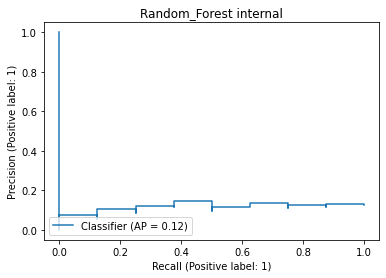

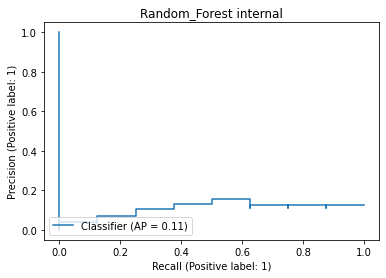

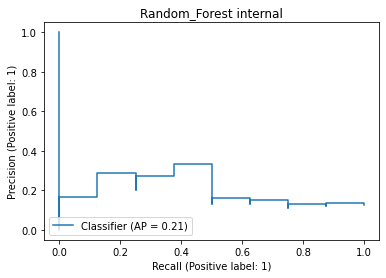

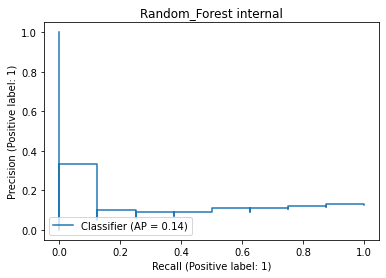

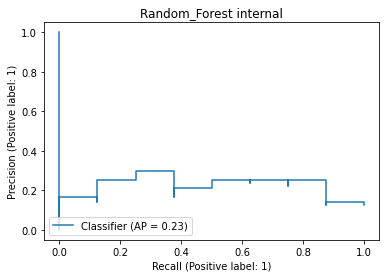

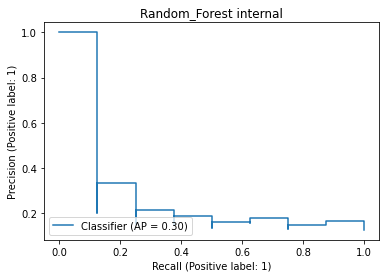

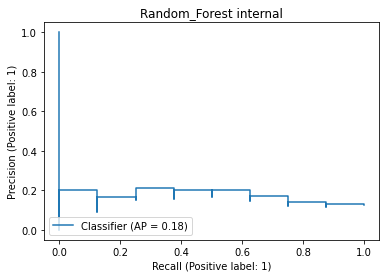

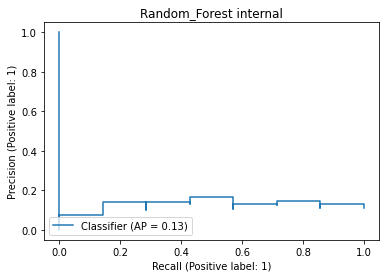

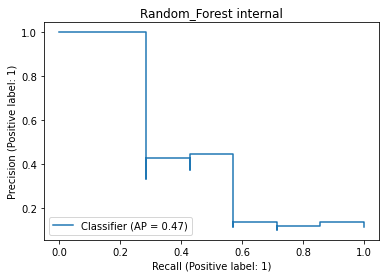

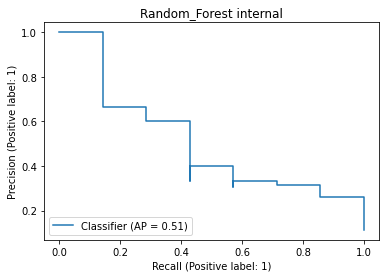

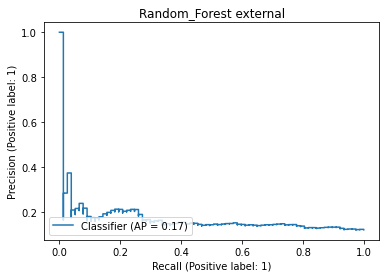

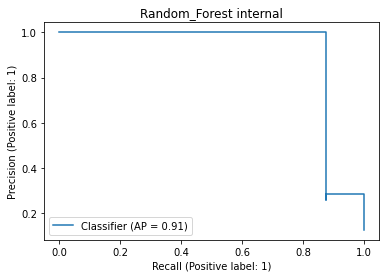

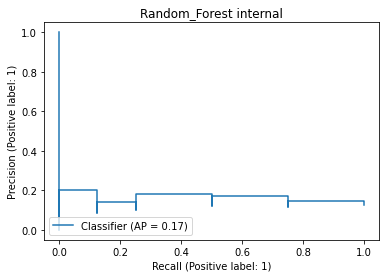

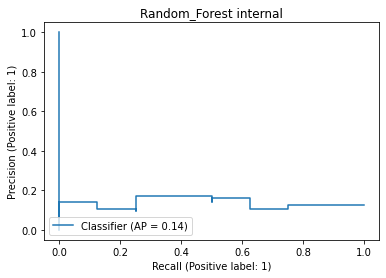

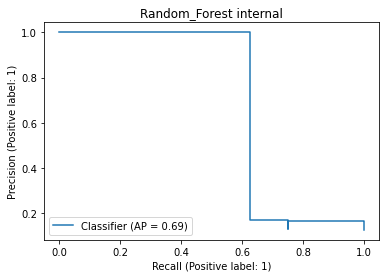

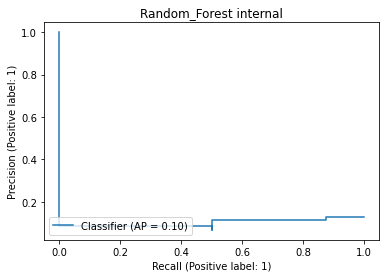

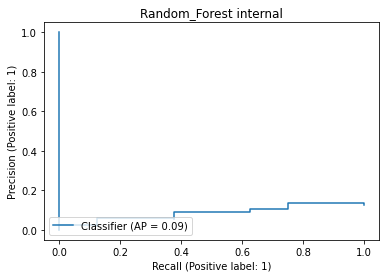

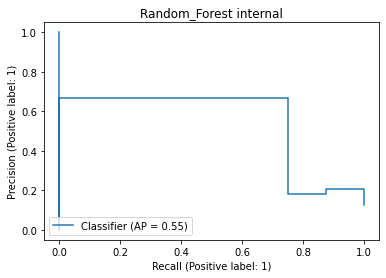

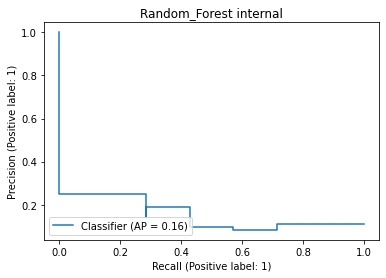

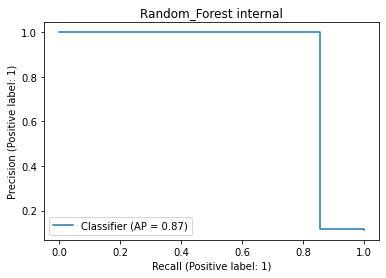

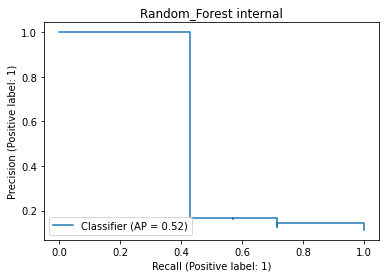

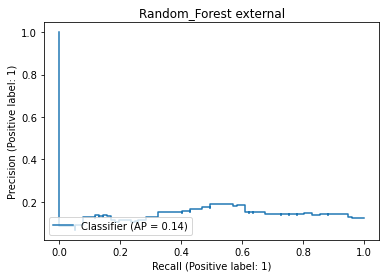

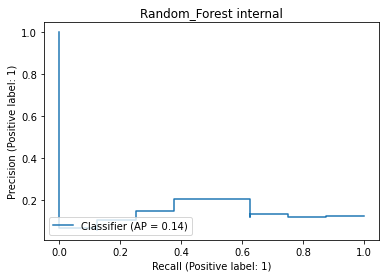

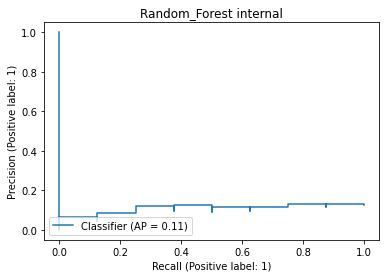

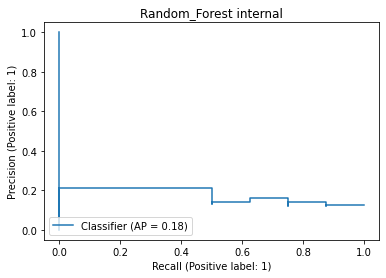

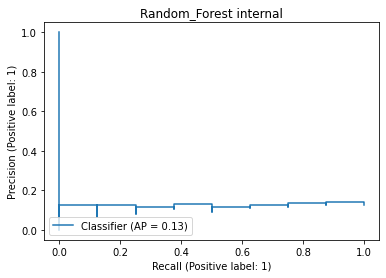

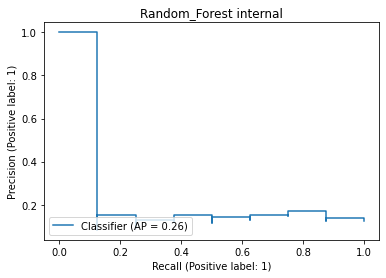

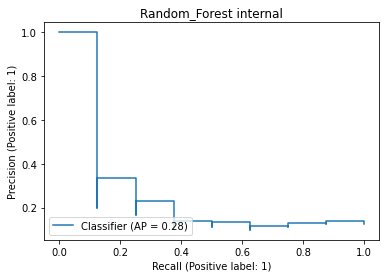

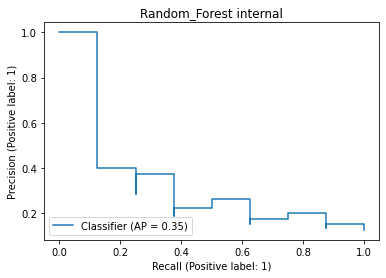

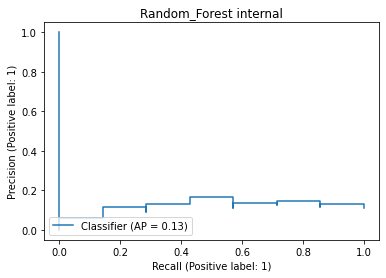

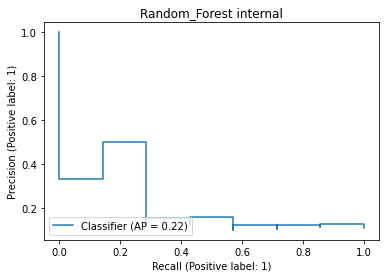

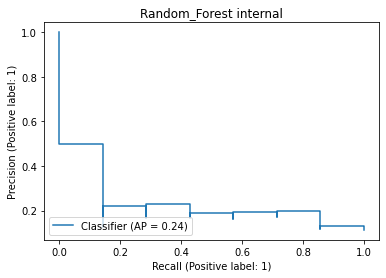

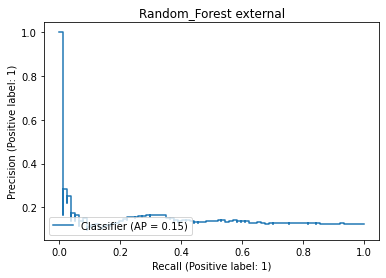

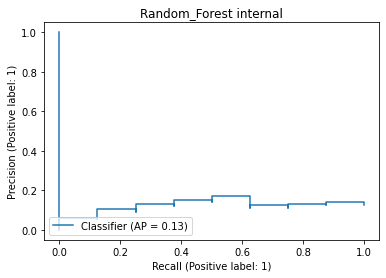

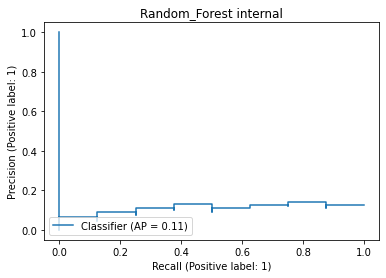

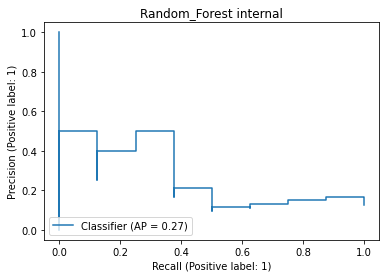

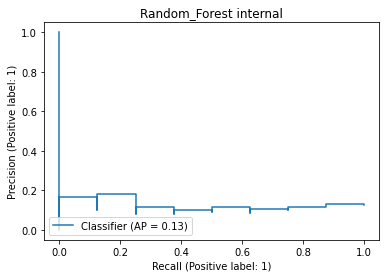

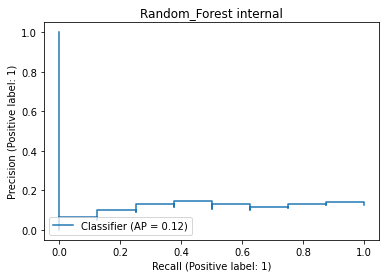

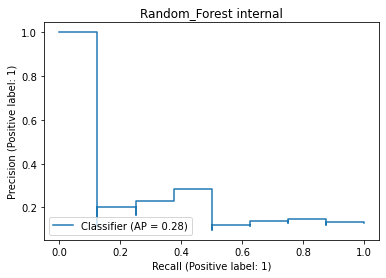

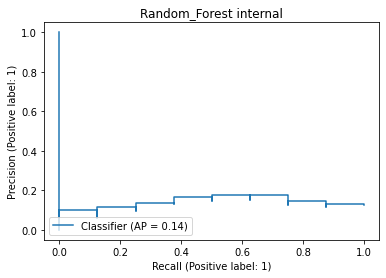

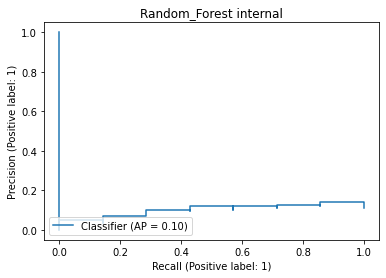

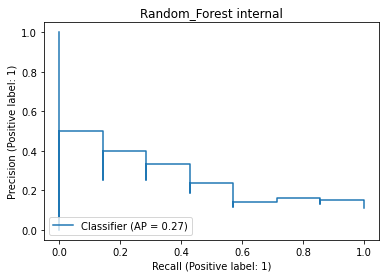

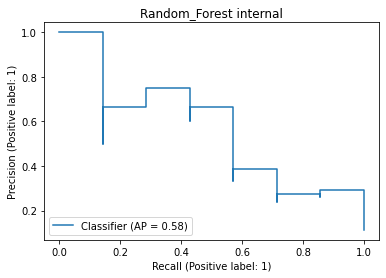

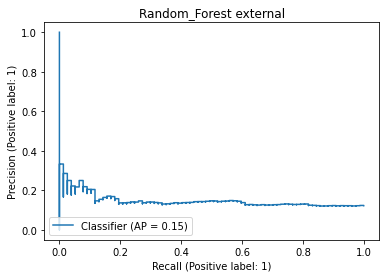

In [42]:
dataset_list = ['mrna']
mrna_file_name = ['result_Many_Feature_Selection_notebook/mrna/mrna.json']
feature_selection_list = ['mannwhitneyu','mannwhitneyu_with_umap', 'boruta', 'mine']
#,'mrmr'

!mkdir 'result_Many_Feature_Selection_notebook/mrna'
create_result_json(result_dict, feature_selection_list, mrna_file_name, dataset_list, label, datasets)

# Create miRNA result using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mic, boruta

In [ ]:
dataset_list = ['mirna']
mirna_file_name = ['result/mirna/mirna.json']
feature_selection_list = ['mannwhitneyu','mannwhitneyu_with_umap', 'boruta', 'mine', 'mrmr']

!mkdir 'result_Many_Feature_Selection_notebook/mirna'
create_result_json(result_dict, feature_selection_list, mirna_file_name, dataset_list, label, datasets)

Running training : 0it [00:00, ?it/s]
Running mirna training :   0%|                                                 | 0/5 [00:00<?, ?it/s]

TECNICA DI FS check mannwhitneyu
file name result/mirna/mirna.json




Running fold : 0it [00:00, ?it/s]

Running fold : 1it [00:08,  8.34s/it]

Running fold : 2it [00:15,  7.78s/it]

Running fold : 3it [00:23,  7.57s/it]

Running fold : 4it [00:29,  7.24s/it]

Running fold : 5it [00:34,  6.38s/it]

Running fold : 6it [00:40,  6.33s/it]

Running fold : 7it [00:46,  5.99s/it]

Running fold : 8it [00:52,  6.08s/it]

Running fold : 9it [00:59,  6.41s/it]

Running fold : 10it [01:10,  7.72s/it]

                                      
Running mirna training :  20%|████████▏                                | 1/5 [01:10<04:41, 70.26s/it]

TECNICA DI FS check mannwhitneyu_with_umap
file name result/mirna/mirna.json




Running fold : 0it [00:00, ?it/s]

Running fold : 1it [00:07,  7.01s/it]

Running fold : 2it [00:14,  7.48s/it]

Running fold : 3it [00:22,  7.41s/it]

Running fold : 4it [00:28,  7.14s/it]

Running fold : 5it [00:36,  7.16s/it]

Running fold : 6it [00:42,  6.98s/it]

Running fold : 7it [00:49,  7.04s/it]

Running fold : 8it [00:57,  7.20s/it]

Running fold : 9it [01:05,  7.50s/it]

Running fold : 10it [01:12,  7.35s/it]

                                      
Running mirna training :  40%|████████████████▍                        | 2/5 [02:22<03:34, 71.65s/it]

TECNICA DI FS check boruta
file name result/mirna/mirna.json




Running fold : 0it [00:00, ?it/s]

execute boruta




Running fold : 1it [00:13, 13.71s/it]

execute boruta




Running fold : 2it [00:23, 11.13s/it]

execute boruta




Running fold : 3it [00:34, 11.17s/it]

execute boruta




Running fold : 4it [00:47, 11.98s/it]

execute boruta




Running fold : 5it [01:00, 12.36s/it]

execute boruta




Running fold : 6it [01:12, 12.29s/it]

execute boruta




Running fold : 7it [01:21, 11.31s/it]

execute boruta




Running fold : 8it [01:32, 11.08s/it]

execute boruta




Running fold : 9it [01:41, 10.36s/it]

execute boruta




Running fold : 10it [01:50,  9.89s/it]

                                      
Running mirna training :  60%|████████████████████████▌                | 3/5 [04:13<02:58, 89.24s/it]

TECNICA DI FS check mine
file name result/mirna/mirna.json




Running fold : 0it [00:00, ?it/s]


Running MINE test:   0%|                                                     | 0/773 [00:00<?, ?it/s]


Running MINE test:  13%|█████▍                                   | 103/773 [00:00<00:00, 1027.60it/s]


Running MINE test:  27%|███████████▏                              | 206/773 [00:00<00:00, 742.29it/s]


Running MINE test:  37%|███████████████▍                          | 285/773 [00:00<00:00, 756.76it/s]


Running MINE test:  58%|███████████████████████▋                 | 446/773 [00:00<00:00, 1054.38it/s]


Running MINE test:  73%|█████████████████████████████▉           | 565/773 [00:00<00:00, 1097.75it/s]


Running MINE test:  96%|███████████████████████████████████████▎ | 742/773 [00:00<00:00, 1311.97it/s]


                                                                                                     

Running fold : 1it [00:20, 20.84s/it]


Running MINE test:   0%|                                                     | 0/773 [00:00

Running MINE test:  45%|███████████████████                       | 351/773 [00:00<00:00, 726.47it/s]


Running MINE test:  60%|█████████████████████████                 | 461/773 [00:00<00:00, 847.22it/s]


Running MINE test:  78%|███████████████████████████████▉         | 603/773 [00:00<00:00, 1029.37it/s]


Running MINE test:  98%|████████████████████████████████████████ | 756/773 [00:00<00:00, 1176.62it/s]


                                                                                                     

Running fold : 9it [03:00, 19.83s/it]


Running MINE test:   0%|                                                     | 0/773 [00:00<?, ?it/s]


Running MINE test:  13%|█████▍                                     | 97/773 [00:00<00:00, 969.86it/s]


Running MINE test:  25%|██████████▌                               | 194/773 [00:00<00:00, 758.60it/s]


Running MINE test:  35%|██████████████▊                           | 273/773 [00:00<00:00, 709.25it/s]


Running MINE test:  56%|█

TECNICA DI FS check mrmr
file name result/mirna/mirna.json




Running fold : 0it [00:00, ?it/s]

a_pS664 	 0.043
10 	 135 	 PKC-alpha 	 0.043
11 	 144 	 Paxillin 	 0.043
12 	 133 	 PI3K-p110-alpha 	 0.043
13 	 155 	 S6 	 0.043
14 	 158 	 SCD 	 0.043
15 	 157 	 S6_pS240_S244 	 0.043
16 	 156 	 S6_pS235_S236 	 0.043
17 	 132 	 PEA15_pS116 	 0.043
18 	 154 	 Rictor_pT1135 	 0.043
19 	 147 	 Rab25 	 0.043
20 	 150 	 Raptor 	 0.043
21 	 149 	 Rad51 	 0.043
22 	 148 	 Rad50 	 0.043
23 	 134 	 PI3K-p85 	 0.043
24 	 160 	 SF2 	 0.043
25 	 113 	 MSH2 	 0.043
26 	 111 	 MEK1_pS217_S221 	 0.043
27 	 117 	 Myosin-IIa_pS1943 	 0.043
28 	 116 	 Mre11 	 0.043
29 	 119 	 N-Ras 	 0.043
30 	 112 	 MIG-6 	 0.043
31 	 110 	 MEK1 	 0.043
32 	 2 	 14-3-3_zeta 	 0.043
33 	 125 	 PAI-1 	 0.043
34 	 130 	 PDK1_pS241 	 0.043
35 	 128 	 PDCD4 	 0.043
36 	 121 	 NF-kB-p65_pS536 	 0.043
37 	 123 	 Notch1 	 0.043
38 	 122 	 NF2 	 0.043
39 	 159 	 SETD2 	 0.043
40 	 106 	 Ku80 	 0.043
41 	 197 	 eEF2 	 0.043
42 	 195 	 c-Myc 	 0.043
43 	 200 	 eIF4G 	 0.043
44 	 198 	 eEF2K 	 0.043
45 	 202 	 mTOR_pS2448 	 0.04



Running fold : 1it [1:14:38, 4478.60s/it]

# Create concatenation of all dataset

In [ ]:
dataset_whole_dataset = pd.concat([datasets['cnv'], datasets['proteins'], datasets['mrna'], datasets['mirna']], axis=1)
datasets['whole_dataset'] = dataset_whole_dataset

# Create whole dataset result using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mic, boruta

In [ ]:
dataset_list = ['whole_dataset']
whole_dataset_file_name = ['result_Many_Feature_Selection_notebook/whole_dataset/whole_dataset.json']
feature_selection_list = ['mannwhitneyu','mannwhitneyu_with_umap','boruta']
#,'mine']
#, 'mrmr']

!mkdir 'result_Many_Feature_Selection_notebook/whole_dataset'
create_result_json(result_dict, feature_selection_list, whole_dataset_file_name, dataset_list, label, datasets)